# Análisis exploratorio de datos

Ahora vamos a explorar un dataset para obtener información y crear un mejor sentido de comprensión sobre el mismo. 

En internet, podemos encontrar muchos datasets gratuitos para descargar en formato csv. Por ejemplo:

- Datos abiertos de Argentina: https://datos.gob.ar/
- Google: https://datasetsearch.research.google.com/

En este caso, vamos a explorar un dataset que contiene datos sobre precios de casas en sidney. Lo descargamos de https://www.kaggle.com/mihirhalai/sydney-house-prices

**Usamos SydneyHousePrices.csv**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive  # La usamos para montar nuestra unidad de Google Drive

# drive.mount("/content/drive")  # Montamos nuestra unidad de Google Drive

In [3]:
df = pd.read_csv("SydneyHousePrices.csv")

Empecemos a explorar. Lo primero es saber con que datos contamos y que significan cada una de las columnas

In [4]:
df.tail()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse
199503,2011-04-16,199504,Alfords Point,2234,1611000,5.0,4,3.0,house


Las columnas que tenemos son:

- Id: es simplemente un valor numérico que identifica a la propiedad. No nos es útil para el análisis (la podemos descartar).
- Date: Fecha de publicación
- suburb: suburbio
- postalCode: Código postal
- sellPrice: Precio de la casa
- bed: Cuantas camas tiene
- Car: Lugar para cuantos autos tiene
- propType: tipo de propiedad

Ahora, que tipos de datos contienen las columnas?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199504 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        199504 non-null  object 
 1   Id          199504 non-null  int64  
 2   suburb      199504 non-null  object 
 3   postalCode  199504 non-null  int64  
 4   sellPrice   199504 non-null  int64  
 5   bed         199350 non-null  float64
 6   bath        199504 non-null  int64  
 7   car         181353 non-null  float64
 8   propType    199504 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.7+ MB


¿ Cuántas filas tiene el dataset ?

In [6]:
df.shape[0]

199504

Tenemos valores nulos?

In [7]:
df.isna().sum()

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64

¿ Qué porcentaje de nulos hay por columna ?

In [8]:
df.isna().sum() / df.shape[0]

Date          0.000000
Id            0.000000
suburb        0.000000
postalCode    0.000000
sellPrice     0.000000
bed           0.000772
bath          0.000000
car           0.090981
propType      0.000000
dtype: float64

<span style='color:salmon'>Primero se eliminan los registros con nan, ya que funciones como np.quantil darán error (o sino usar np.nanquantil o sino df[].quantil de pandas). Ademas los Nans en total representan menos poco más del 9% del total de los registros.
En lo que sigue se haran todos los cálculos con y sin nans df para el dataframe con nans y dfc para el dataframe sin nans</span>

In [9]:
dfc = df.dropna()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181267 entries, 0 to 199503
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        181267 non-null  object 
 1   Id          181267 non-null  int64  
 2   suburb      181267 non-null  object 
 3   postalCode  181267 non-null  int64  
 4   sellPrice   181267 non-null  int64  
 5   bed         181267 non-null  float64
 6   bath        181267 non-null  int64  
 7   car         181267 non-null  float64
 8   propType    181267 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 13.8+ MB


In [10]:
dfc.isna().sum()

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64

Las separemos en variables numéricas y categóricas:

Numéricas (cuantitativas):
- sellPrice	
- bed	
- bath	
- car

Categóricas:
- suburb
- postalCode
- propType

## Análisis varibales categóricas

Exploramos las variables categóricas

### ¿ Cuántos valores únicos hay en cada columna de las categóricas ?

In [11]:
df["suburb"].nunique()

685

In [12]:
dfc["suburb"].nunique()

672

In [13]:
df["postalCode"].nunique()

235

In [14]:
dfc["postalCode"].nunique()

234

In [15]:
df["propType"].nunique()

8

In [16]:
dfc["propType"].nunique()

8

Podemos ver como se distribuyen estas variables categóricas:

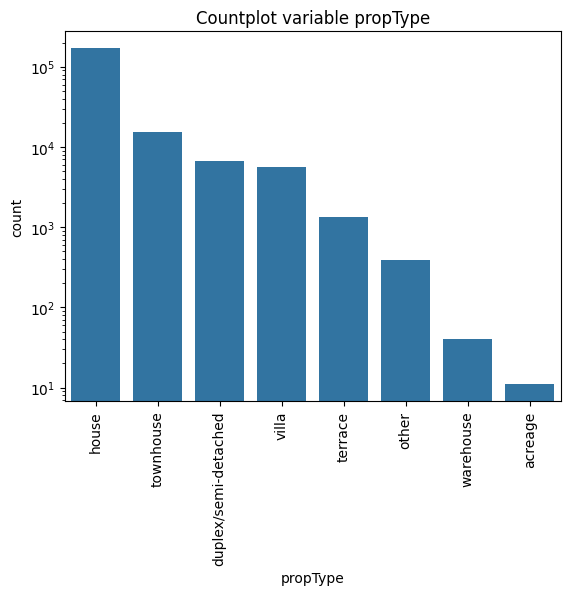

In [17]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x="propType", data=df, order=df.propType.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable propType")
plt.show()

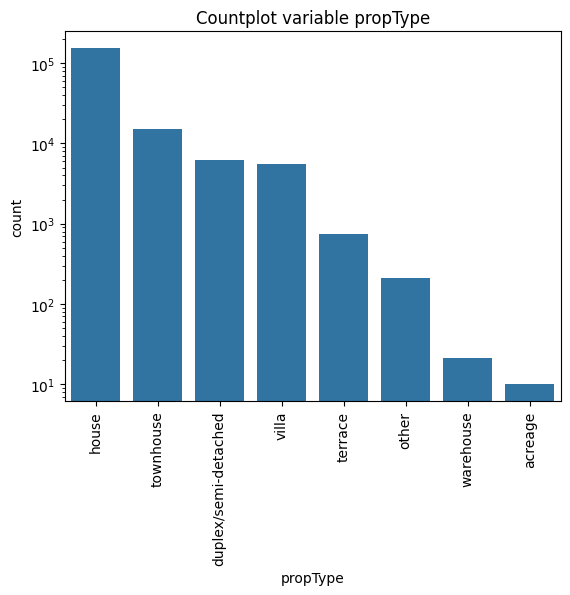

In [18]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x="propType", data=dfc, order=dfc.propType.value_counts().index)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Countplot variable propType")
plt.show()

In [19]:
df.propType.value_counts()

propType
house                   170117
townhouse                15177
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      392
warehouse                   40
acreage                     11
Name: count, dtype: int64

In [20]:
dfc.propType.value_counts()

propType
house                   153441
townhouse                15078
duplex/semi-detached      6174
villa                     5590
terrace                    740
other                      213
warehouse                   21
acreage                     10
Name: count, dtype: int64

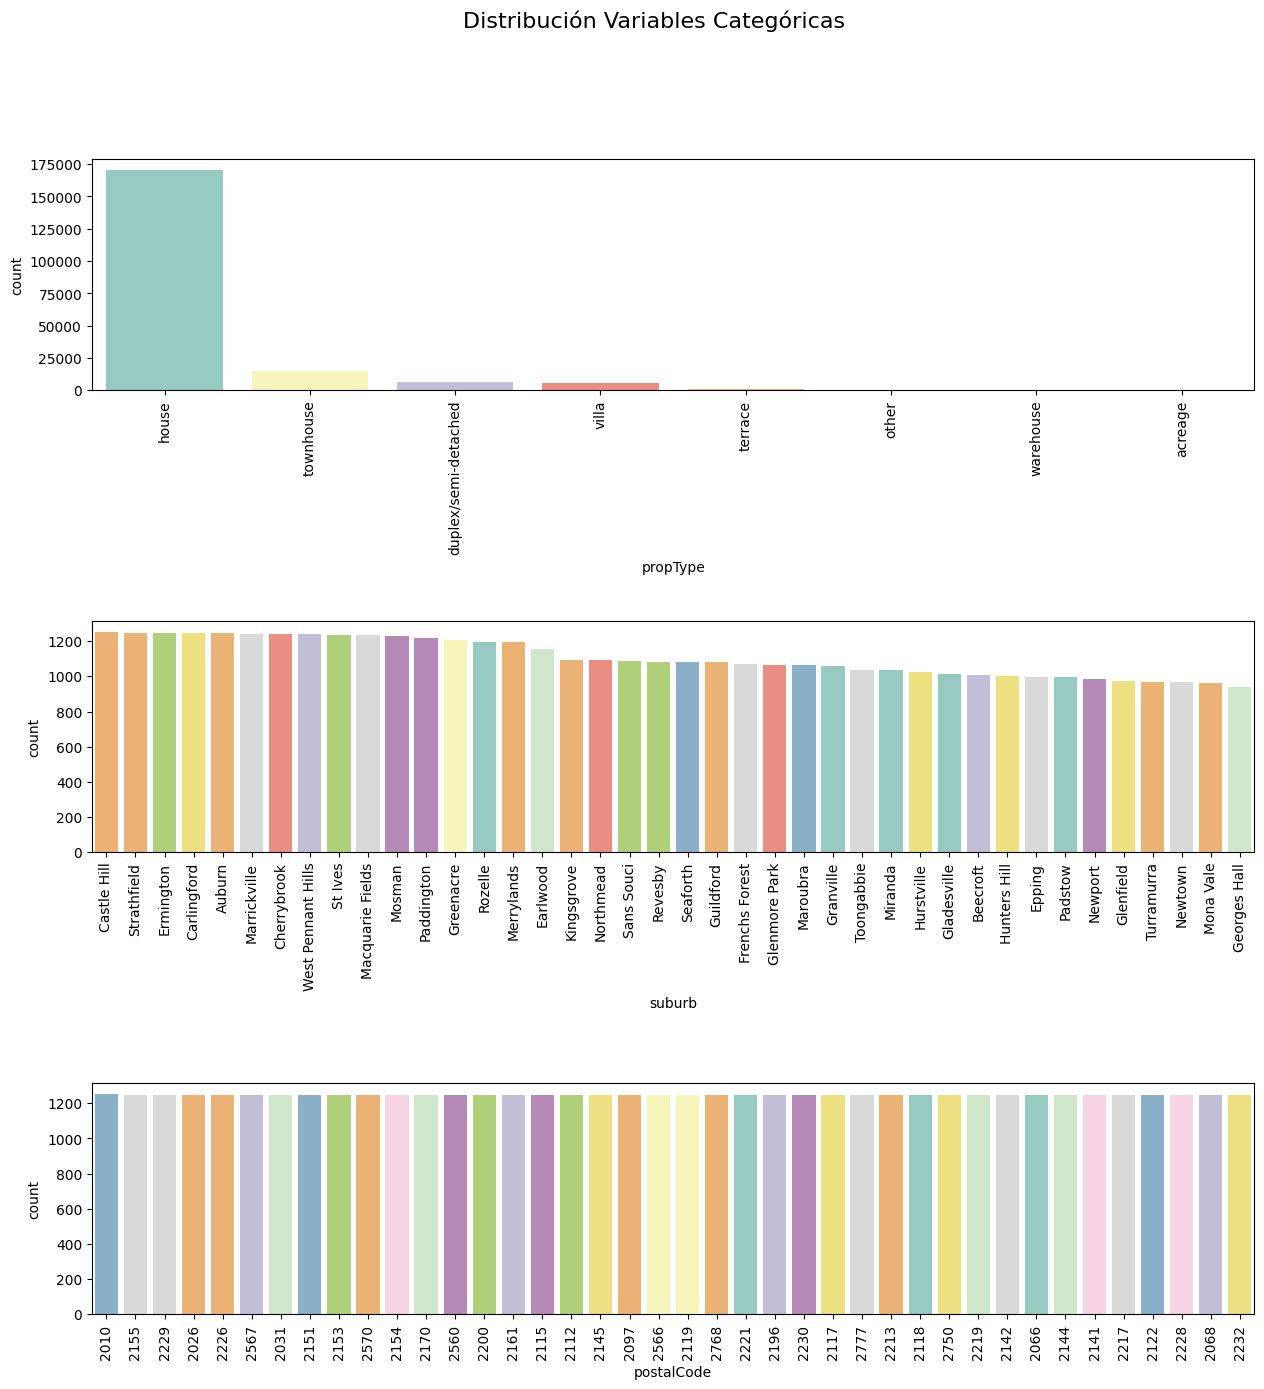

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

fig.suptitle("Distribución Variables Categóricas", fontsize=16)
ax[0].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="x", rotation=90)
ax[2].tick_params(axis="x", rotation=90)
plt.subplots_adjust(hspace=1)

sns.countplot(
    x="propType",
    data=df,
    ax=ax[0],
    order=df.propType.value_counts().index,
    palette="Set3",
    hue="propType",
    legend=False,
)
sns.countplot(
    x="suburb",
    data=df,
    ax=ax[1],
    order=df.suburb.value_counts()[:40].index,
    palette="Set3",
    hue="suburb",
    legend=False,
)
sns.countplot(
    x="postalCode",
    data=df,
    ax=ax[2],
    order=df.postalCode.value_counts()[:40].index,
    palette="Set3",
    hue="postalCode",
    legend=False,
)
plt.show()

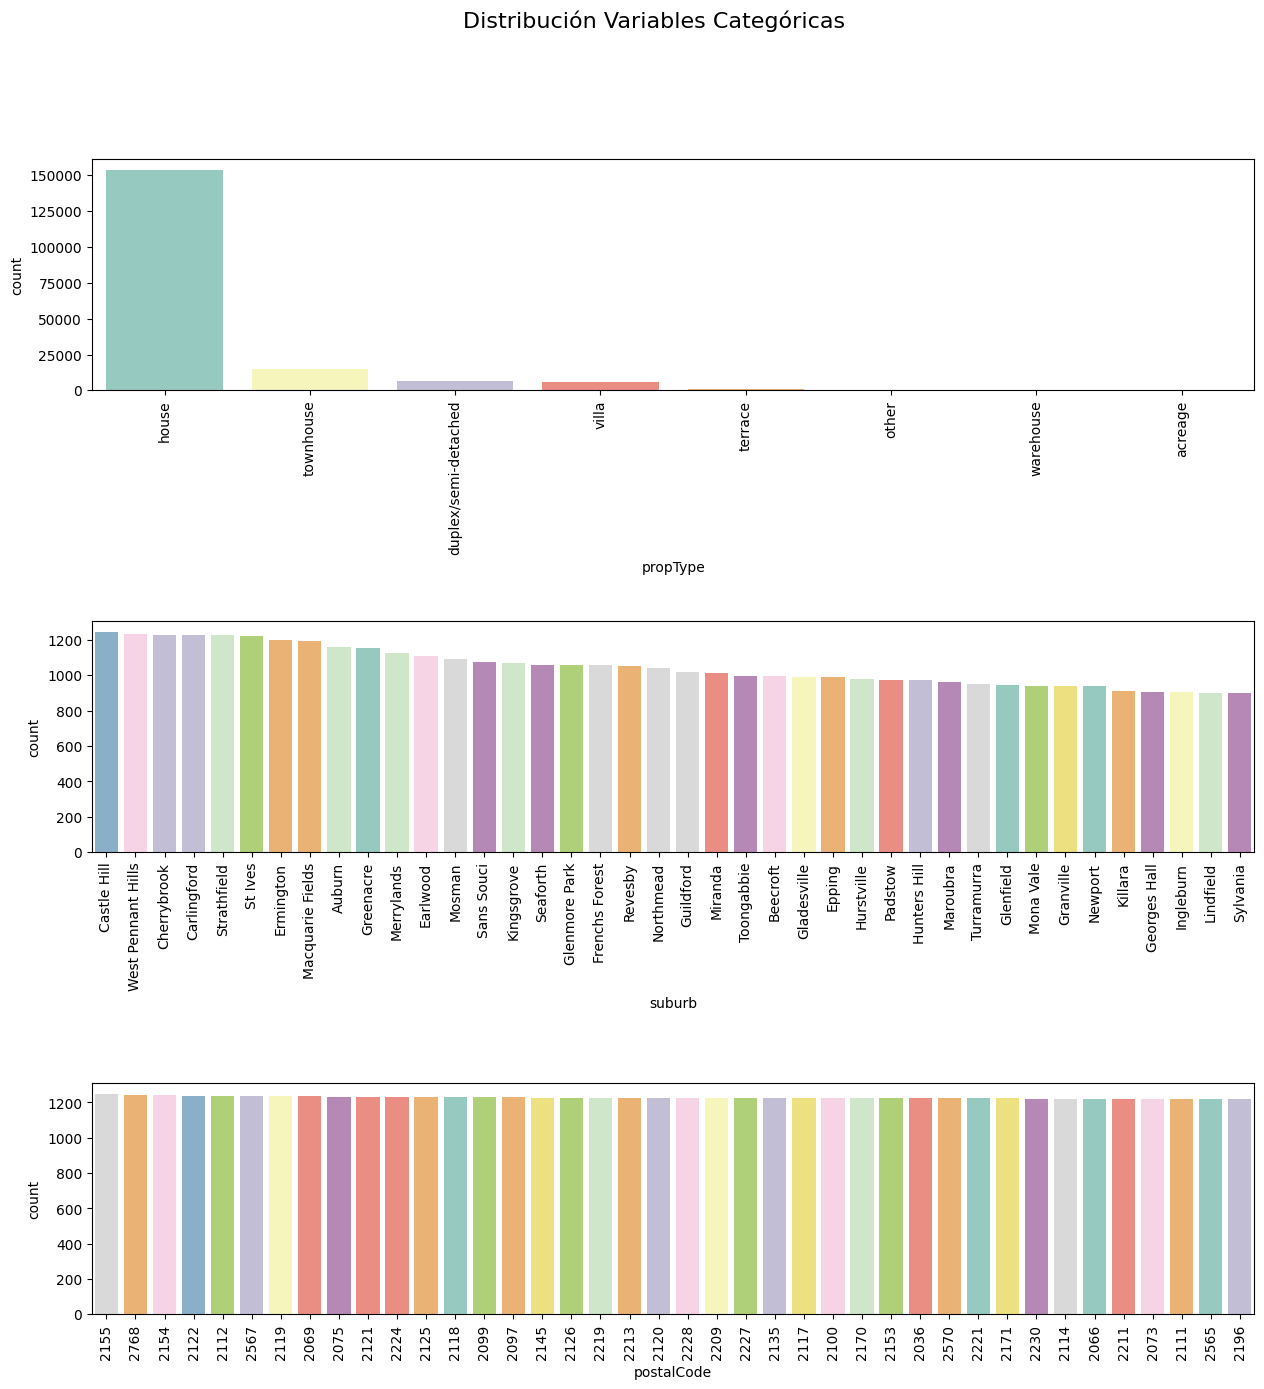

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

fig.suptitle("Distribución Variables Categóricas", fontsize=16)
ax[0].tick_params(axis="x", rotation=90)
ax[1].tick_params(axis="x", rotation=90)
ax[2].tick_params(axis="x", rotation=90)
plt.subplots_adjust(hspace=1)

sns.countplot(
    x="propType",
    data=dfc,
    ax=ax[0],
    order=dfc.propType.value_counts().index,
    palette="Set3",
    hue="propType",
    legend=False,
)
sns.countplot(
    x="suburb",
    data=dfc,
    ax=ax[1],
    order=dfc.suburb.value_counts()[:40].index,
    palette="Set3",
    hue="suburb",
    legend=False,
)
sns.countplot(
    x="postalCode",
    data=dfc,
    ax=ax[2],
    order=dfc.postalCode.value_counts()[:40].index,
    palette="Set3",
    hue="postalCode",
    legend=False,
)
plt.show()

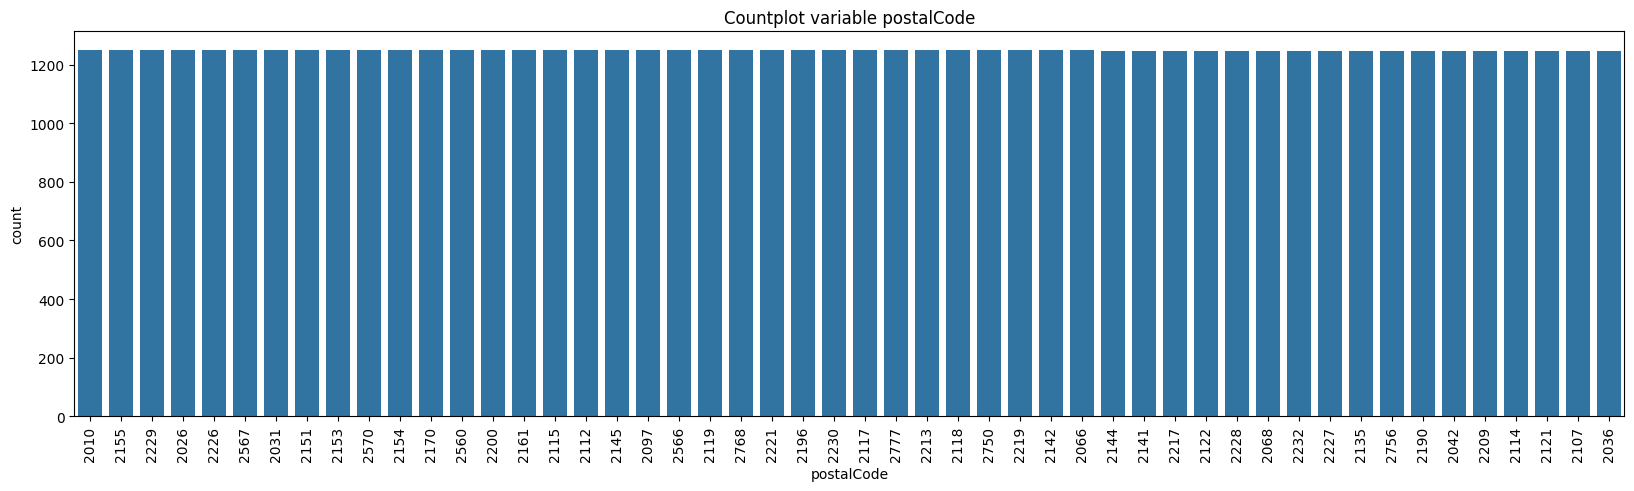

In [23]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="postalCode", data=df, order=df.postalCode.value_counts()[:50].index
)
plt.xticks(rotation=90)
plt.title("Countplot variable postalCode")
plt.show()

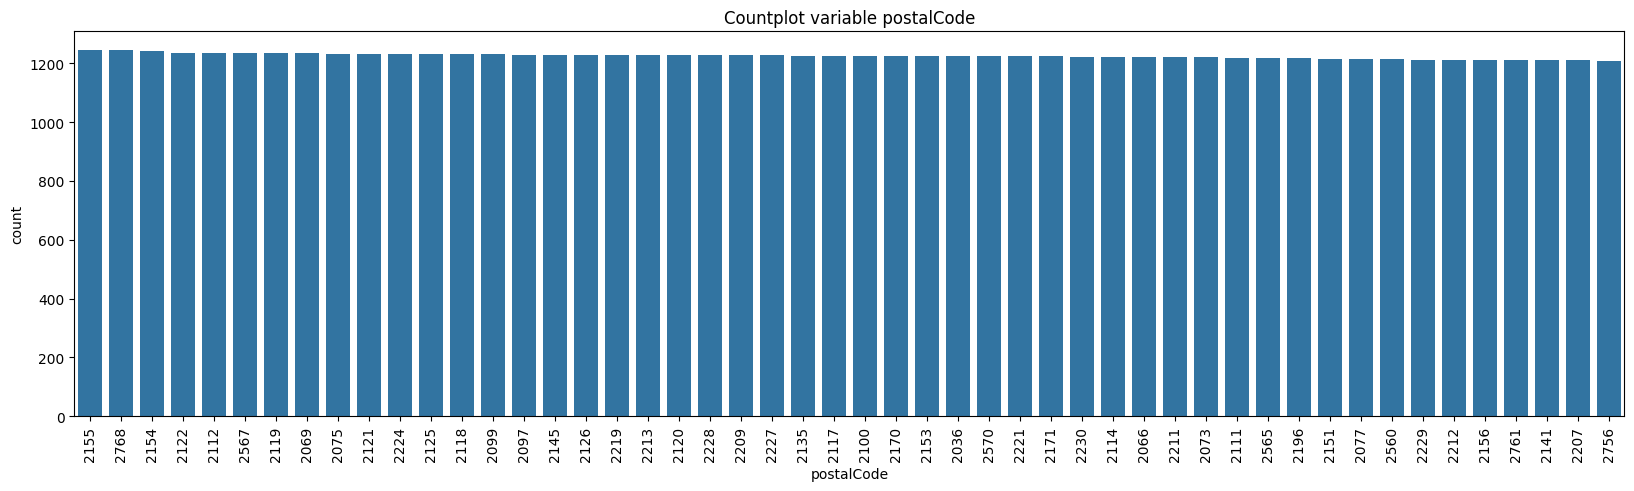

In [24]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="postalCode", data=dfc, order=dfc.postalCode.value_counts()[:50].index
)
plt.xticks(rotation=90)
plt.title("Countplot variable postalCode")
plt.show()

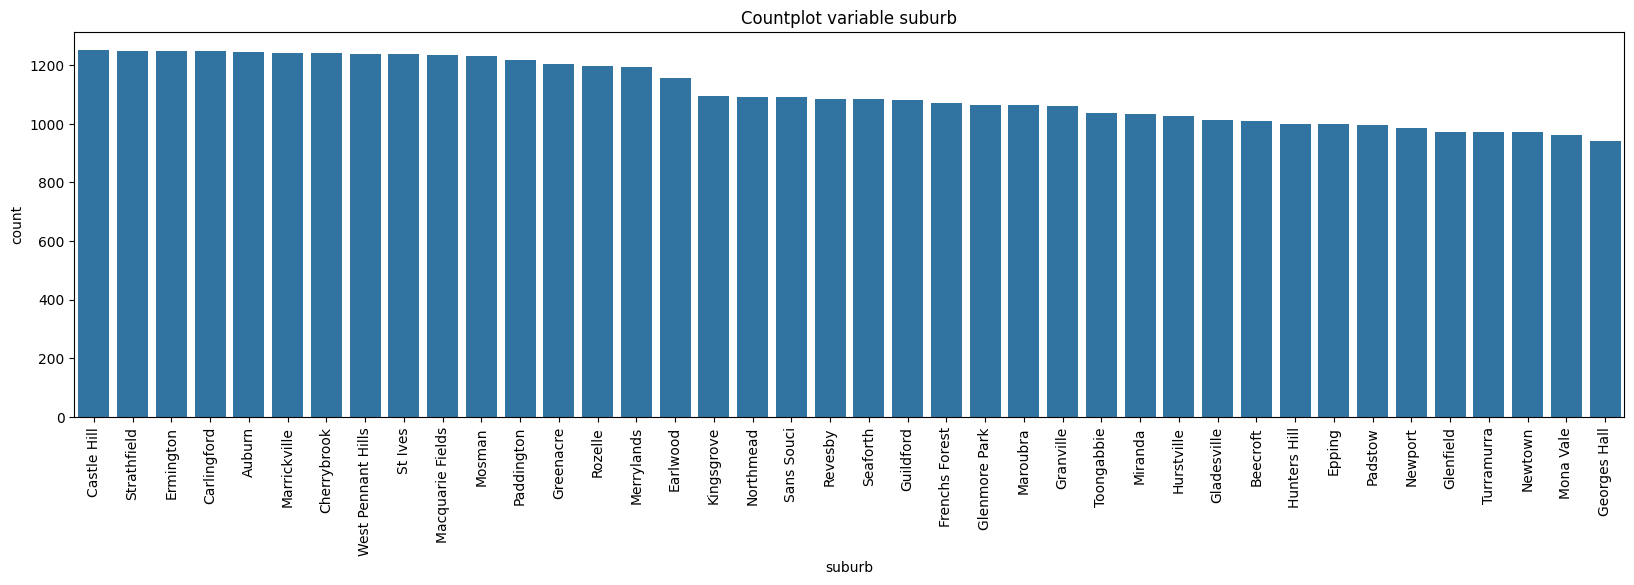

In [25]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(x="suburb", data=df, order=df.suburb.value_counts()[:40].index)
plt.xticks(rotation=90)
plt.title("Countplot variable suburb")
plt.show()

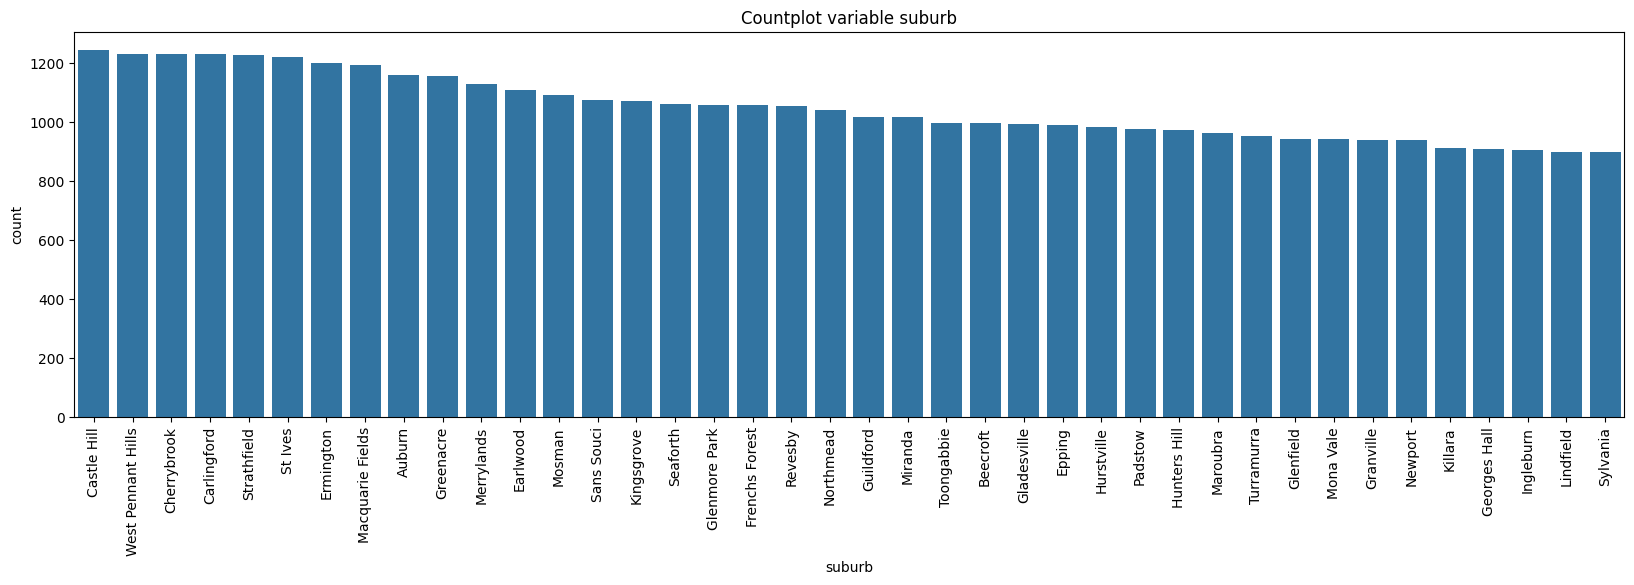

In [26]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(x="suburb", data=dfc, order=dfc.suburb.value_counts()[:40].index)
plt.xticks(rotation=90)
plt.title("Countplot variable suburb")
plt.show()

## Análisis variables numéricas

### ¿ Cómo se distribuyen ?

#### Sell Price

In [27]:
df.sellPrice.describe()

count    1.995040e+05
mean     1.269776e+06
std      6.948239e+06
min      1.000000e+00
25%      7.200000e+05
50%      9.850000e+05
75%      1.475000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64

In [28]:
dfc.sellPrice.describe()

count    1.812670e+05
mean     1.282660e+06
std      7.286335e+06
min      1.000000e+00
25%      7.200000e+05
50%      9.850000e+05
75%      1.485000e+06
max      2.147484e+09
Name: sellPrice, dtype: float64

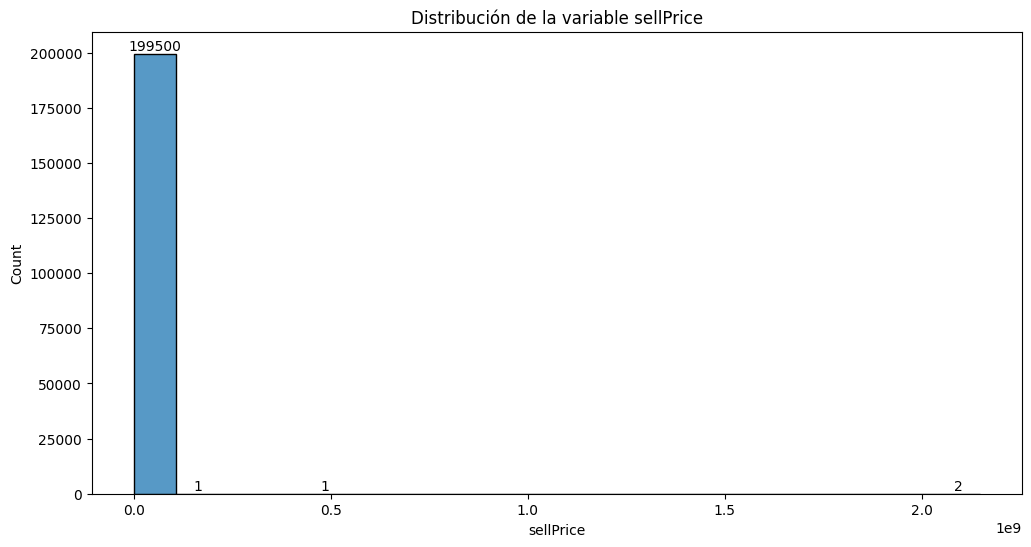

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
# ax = sns.distplot(x=df.sellPrice) # distplot está obsoleto en las nuevas versiones de seaborn
ax = sns.histplot(x=df["sellPrice"], bins=20)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

# Titulo del Histograma
ax.set_title("Distribución de la variable sellPrice")

plt.show()

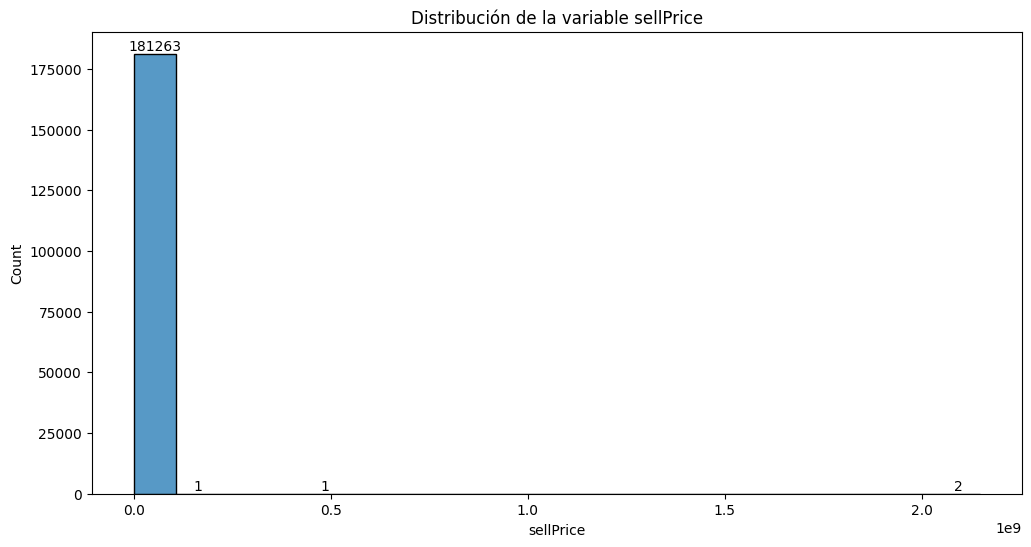

In [30]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
# ax = sns.distplot(x=df.sellPrice) # distplot está obsoleto en las nuevas versiones de seaborn
ax = sns.histplot(x=dfc["sellPrice"], bins=20)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

# Titulo del Histograma
ax.set_title("Distribución de la variable sellPrice")

plt.show()

¿ Por qué se ve tan feo este gráfico ?  
<span style="color: salmon;">1) La escala de las ordenadas deberian ser logaritmica para que se vea mejor.</span>  
<span style="color: salmon;">2) Puede haber valores atípicos o con errores.</span>  

Tenemos valores extemos! Lo podemos ver en un boxplot

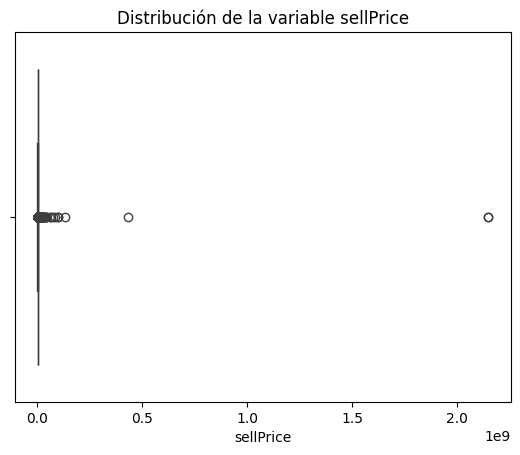

In [31]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.sellPrice)
ax.set_title("Distribución de la variable sellPrice")
plt.show()

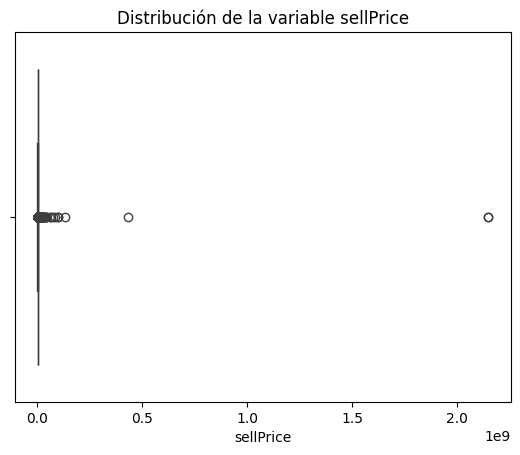

In [32]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc.sellPrice)
ax.set_title("Distribución de la variable sellPrice")
plt.show()

<span style="color: salmon">También lo podemos ver en el histograma.</span>

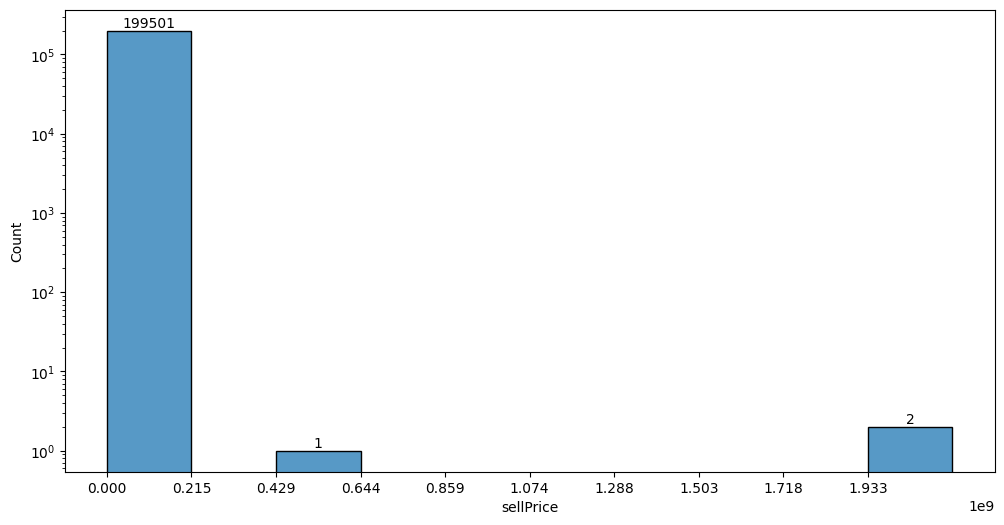

In [33]:
# intv=int(5e6)
# sns.histplot(x='sellPrice',data=df,bins=list(range(0,max(df['sellPrice'])+intv,intv)),binwidth=intv)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
plt.yscale("log")

ax = sns.histplot(x="sellPrice", data=df, bins=10)

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

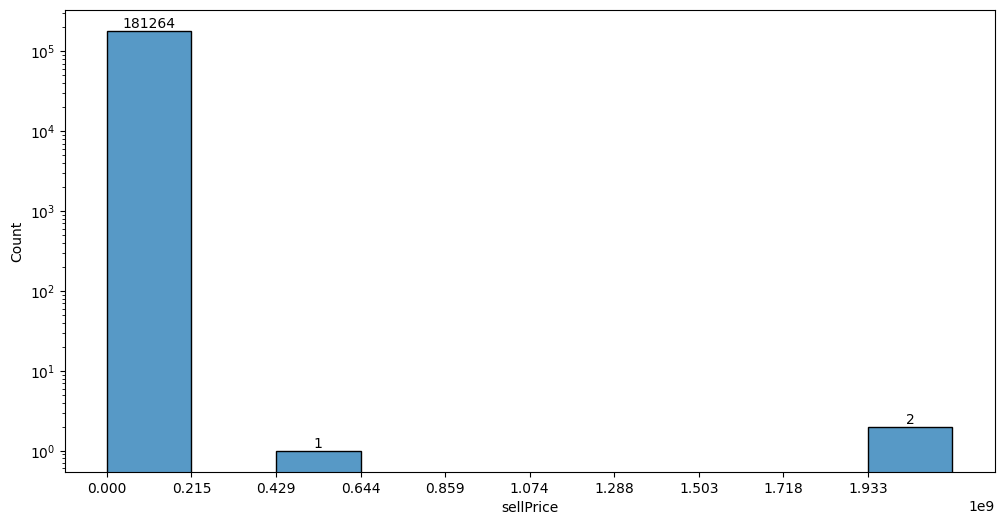

In [34]:
# intv=int(5e6)
# sns.histplot(x='sellPrice',data=df,bins=list(range(0,max(df['sellPrice'])+intv,intv)),binwidth=intv)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
plt.yscale("log")

ax = sns.histplot(x="sellPrice", data=dfc, bins=10)

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

<span style='color:peru'> Se notan dos valores muy extremos. Dos propiedades que valen más de 2 millardos de dólares. Luego de investigación surge que la propiedad más cara del mundo cuesta 1 millardo. Por lo tanto son errores y se eliminan.</span>

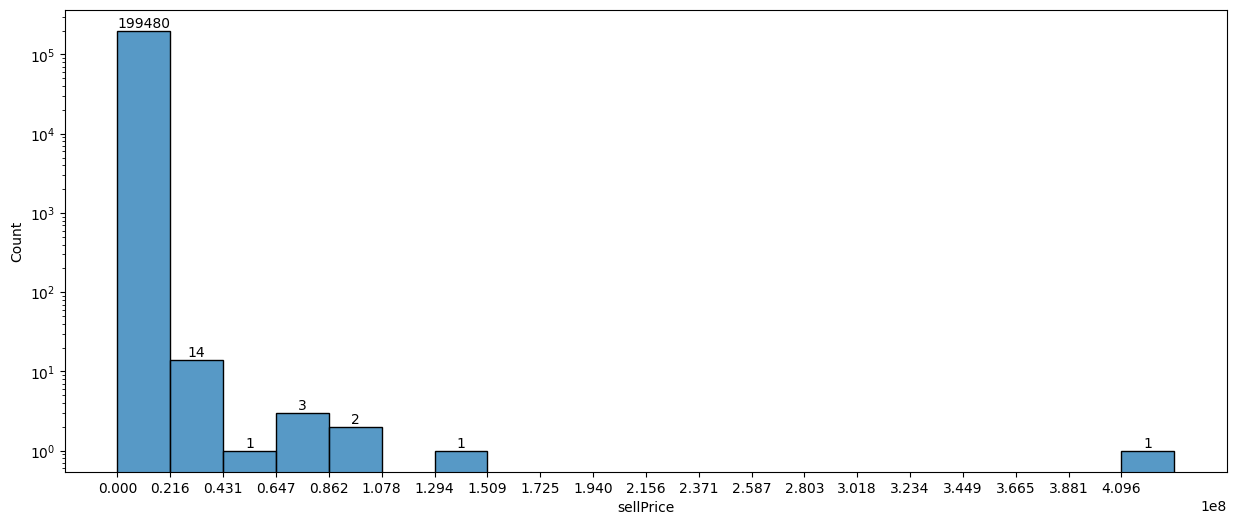

In [35]:
limSup = 1e9
outliers = df["sellPrice"] < limSup


df_filtrados = df["sellPrice"][outliers]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

plt.yscale("log")

ax = sns.histplot(df_filtrados, bins=20)

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

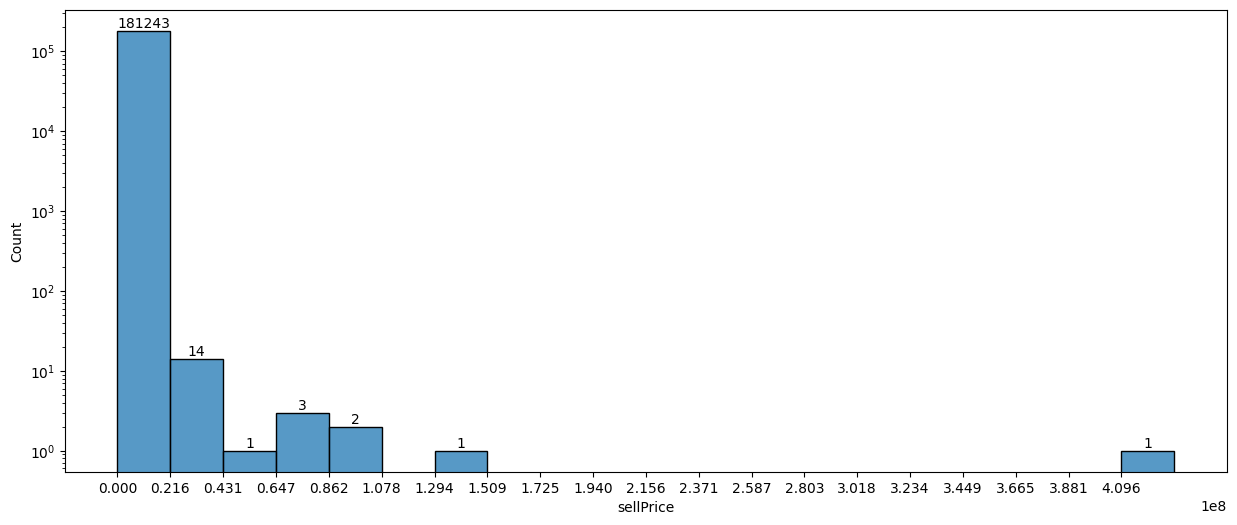

In [36]:
limSup = 1e9
outliers = dfc["sellPrice"] < limSup


dfc_filtrados = dfc["sellPrice"][outliers]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

plt.yscale("log")

ax = sns.histplot(dfc_filtrados, bins=20)

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

En este caso, vamos a descartar estos valores extremos para seguir con nuestro análisis sobre los casos más "normales".

Para esto, vamos a utilizar el IQR.

EJERCICIO: Filtrar outliers utilizando el IQR.

<span style='color:green'>En este caso pide que no se tengan en cuenta valores superiores a </span>  $\color{salmon}{q_3+1.5 \cdot iqr}$ <span style='color:green'>o inferiores a </span> $\color{salmon}{q_1-1.5 \cdot iqr}$.  
<span style='color:green'>Eso no significa que sean valores atípicos (outliers) como si lo eran los anteriores.</span>

In [37]:
# COMPLETAR
q1, q3 = df["sellPrice"].quantile(0.25), df["sellPrice"].quantile(0.75)
iqr = q3 - q1
outliers = (df["sellPrice"] < q1 - 1.5 * iqr) | (df["sellPrice"] > q3 + 1.5 * iqr)
df_Price = df[~outliers].copy()
max(df_Price["sellPrice"])

2607500

In [38]:
# COMPLETAR
q1, q3 = dfc["sellPrice"].quantile(0.25), dfc["sellPrice"].quantile(0.75)
iqr = q3 - q1
outliers = (dfc["sellPrice"] < q1 - 1.5 * iqr) | (dfc["sellPrice"] > q3 + 1.5 * iqr)
dfc_Price = dfc[~outliers].copy()
max(dfc_Price["sellPrice"])

2632000

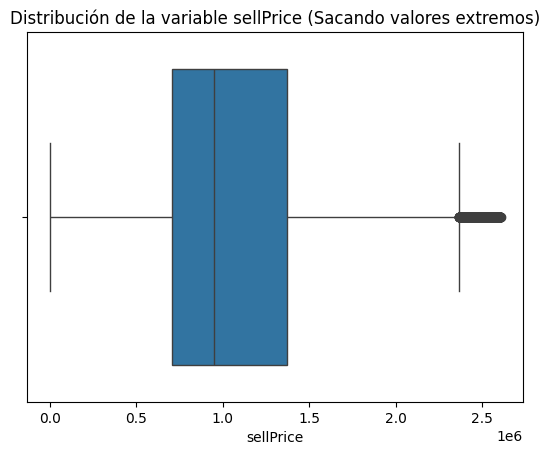

In [39]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price["sellPrice"])
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")
plt.show()

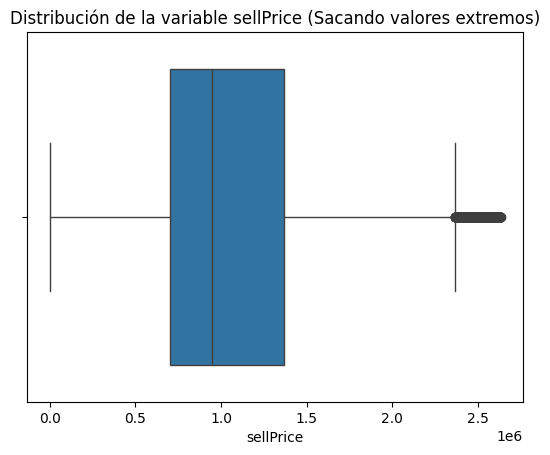

In [40]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price["sellPrice"])
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")
plt.show()

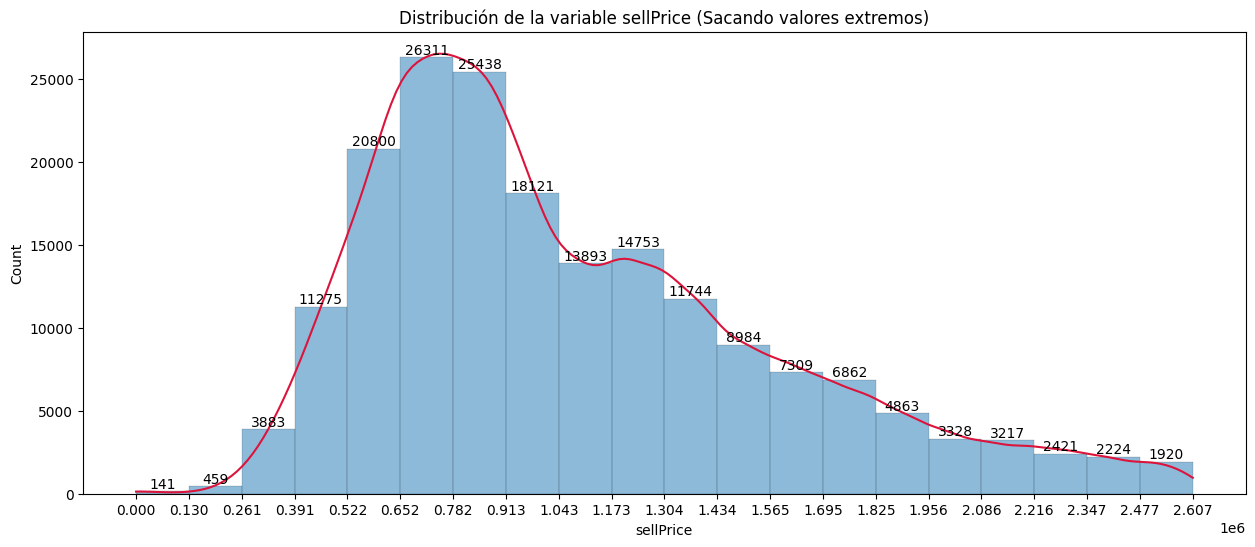

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# plt.yscale("log")
ax = sns.histplot(df_Price["sellPrice"], bins=20, kde=True, linewidth=0.1)
ax.lines[0].set_color("crimson")
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
bin_width = ax.patches[0].get_width()
bin_left.append(bin_left[-1] + bin_width)
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

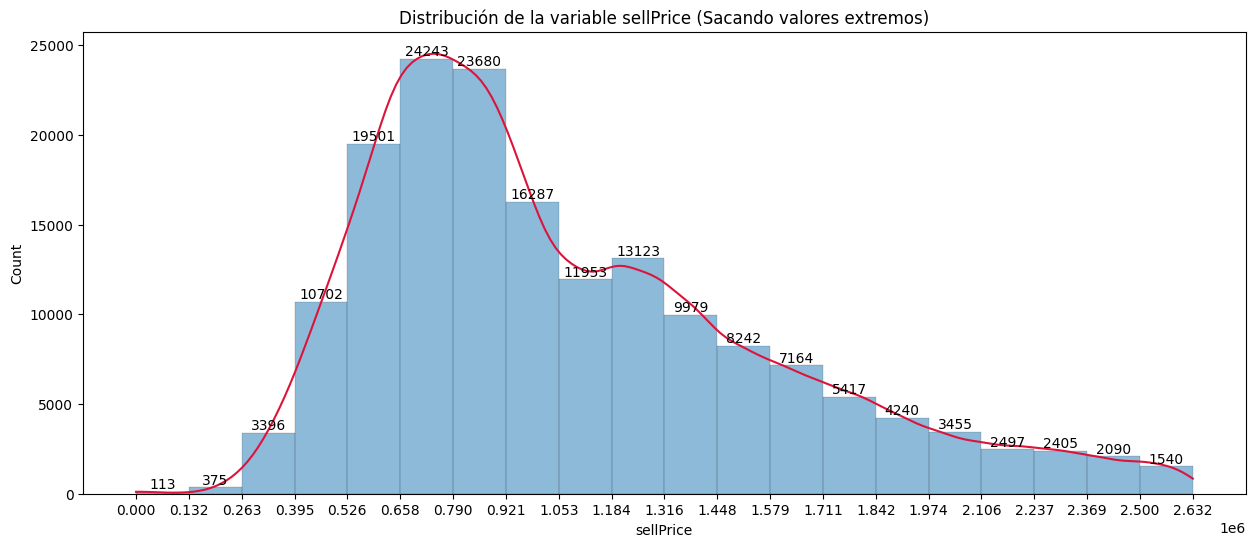

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# plt.yscale("log")
ax = sns.histplot(dfc_Price["sellPrice"], bins=20, kde=True, linewidth=0.1)
ax.lines[0].set_color("crimson")
ax.set_title("Distribución de la variable sellPrice (Sacando valores extremos)")

# Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
bin_left = [patch.get_x() for patch in ax.patches]
bin_width = ax.patches[0].get_width()
bin_left.append(bin_left[-1] + bin_width)
ax.set_xticks(bin_left)

# Etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            int(height),
            (p.get_x() + p.get_width() / 2.0, height),
            ha="center",
            va="bottom",
        )

plt.show()

#### Bed

In [43]:
df_Price.bed.describe()

count    187800.000000
mean          3.455224
std           1.011301
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          99.000000
Name: bed, dtype: float64

In [44]:
dfc_Price.bed.describe()

count    170402.000000
mean          3.524929
std           0.984002
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max          99.000000
Name: bed, dtype: float64

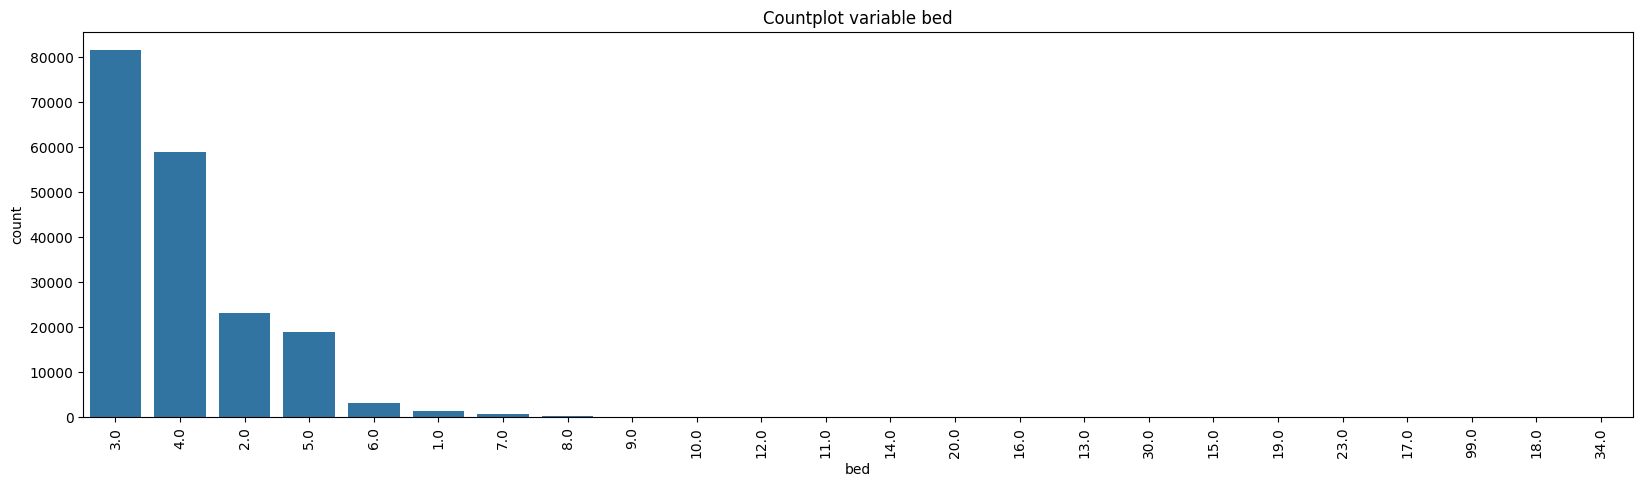

In [45]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(x="bed", data=df_Price, order=df_Price.bed.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable bed")
plt.show()

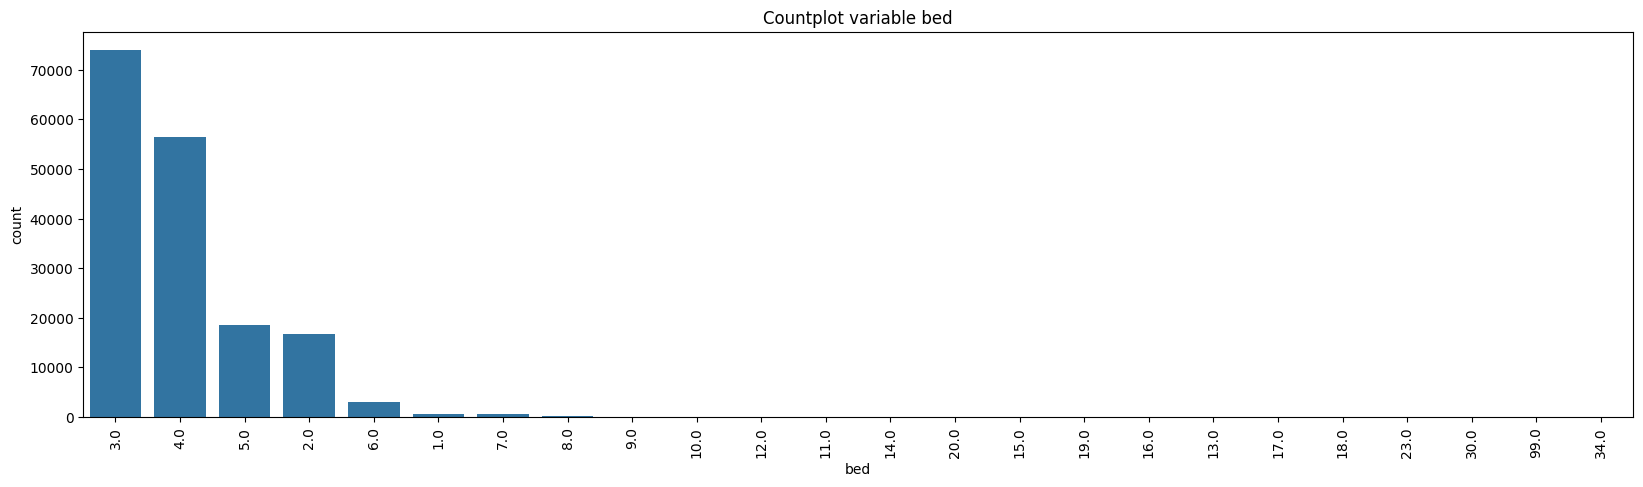

In [46]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(x="bed", data=dfc_Price, order=dfc_Price.bed.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable bed")
plt.show()

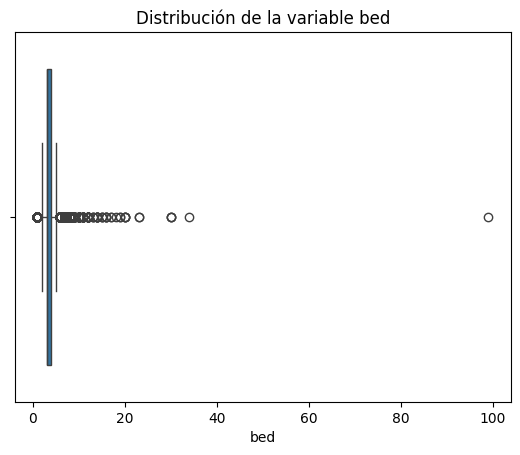

In [47]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price.bed)
ax.set_title("Distribución de la variable bed")
plt.show()

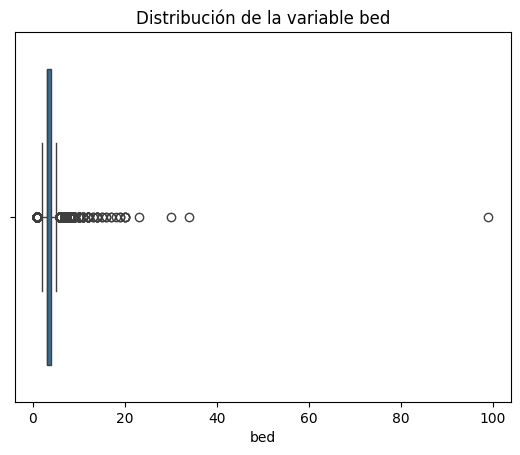

In [48]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price.bed)
ax.set_title("Distribución de la variable bed")
plt.show()

Vemos que la variable bed también tiene muchos valores extremos. La limpiamos para poder visualizar mejor.

Para limpiarla, también vamos a utilizar el IQR.

EJERCICIO: Para no repetir código, hacer una función que reciba un df y el nombre de la columna a limpiar. Esta función debe retornar el df sin outliers en la columna especificada.

In [49]:
# COMPLETAR
def cleanOut(df, col):
    q1, q3 = df[col].quantile(q=0.25), df[col].quantile(q=0.75)
    iqr = q3 - q1
    outliers = (df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)
    df_filtered = df[~outliers].copy()
    return df_filtered


dfc_Price_Bed = cleanOut(dfc_Price, "bed")
df_Price_Bed = cleanOut(df_Price, "bed")

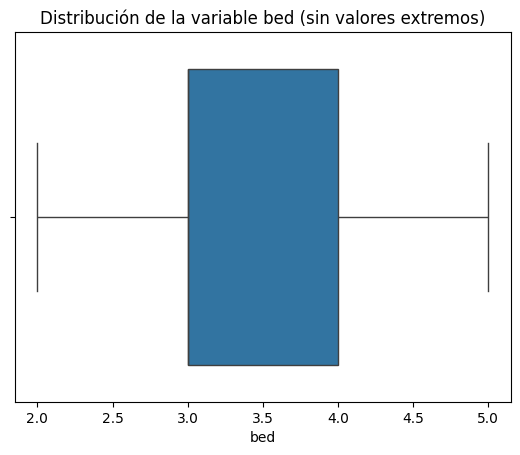

In [50]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price_Bed.bed)
ax.set_title("Distribución de la variable bed (sin valores extremos)")
plt.show()

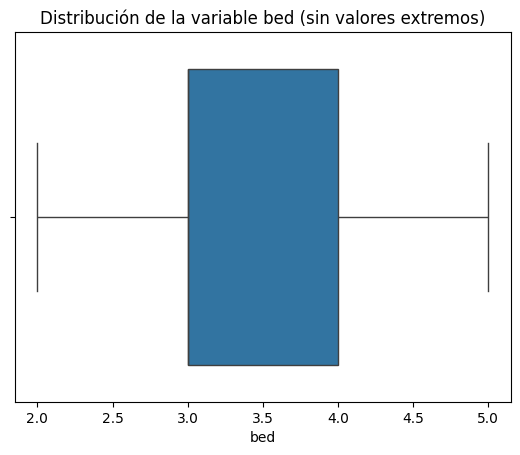

In [51]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price_Bed.bed)
ax.set_title("Distribución de la variable bed (sin valores extremos)")
plt.show()

#### Bath

In [52]:
df_Price_Bed.bath.describe()

count    182481.000000
mean          1.789819
std           0.787878
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          99.000000
Name: bath, dtype: float64

In [53]:
dfc_Price_Bed.bath.describe()

count    165913.000000
mean          1.833871
std           0.757312
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           8.000000
Name: bath, dtype: float64

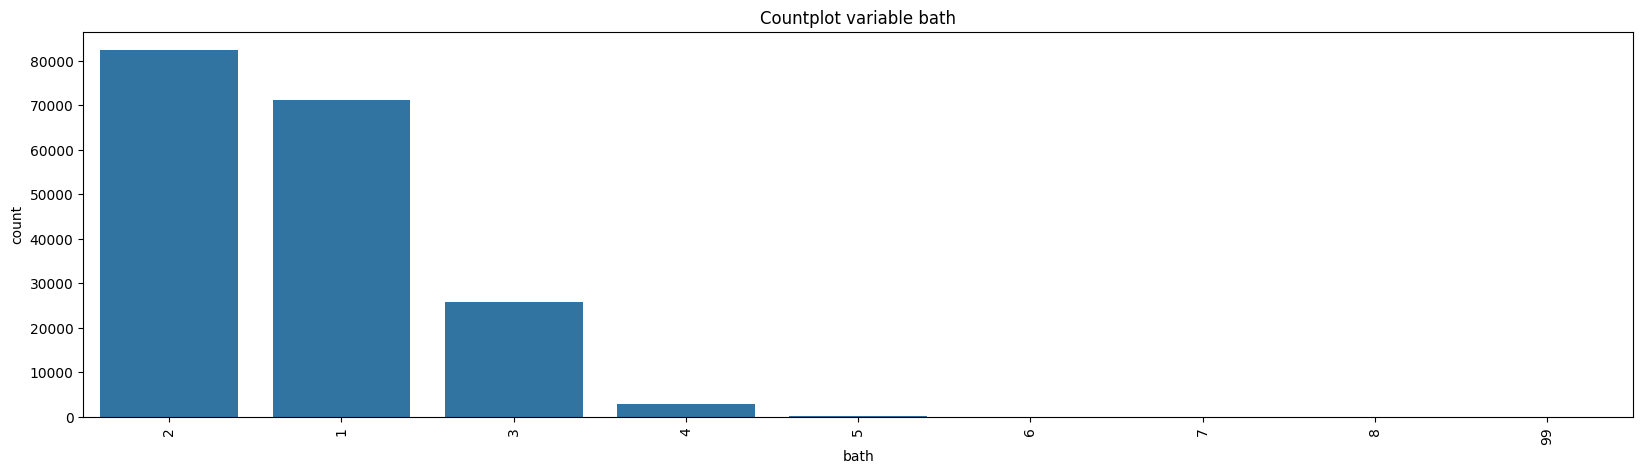

In [54]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="bath", data=df_Price_Bed, order=df_Price_Bed.bath.value_counts().index
)
plt.xticks(rotation=90)
plt.title("Countplot variable bath")
plt.show()

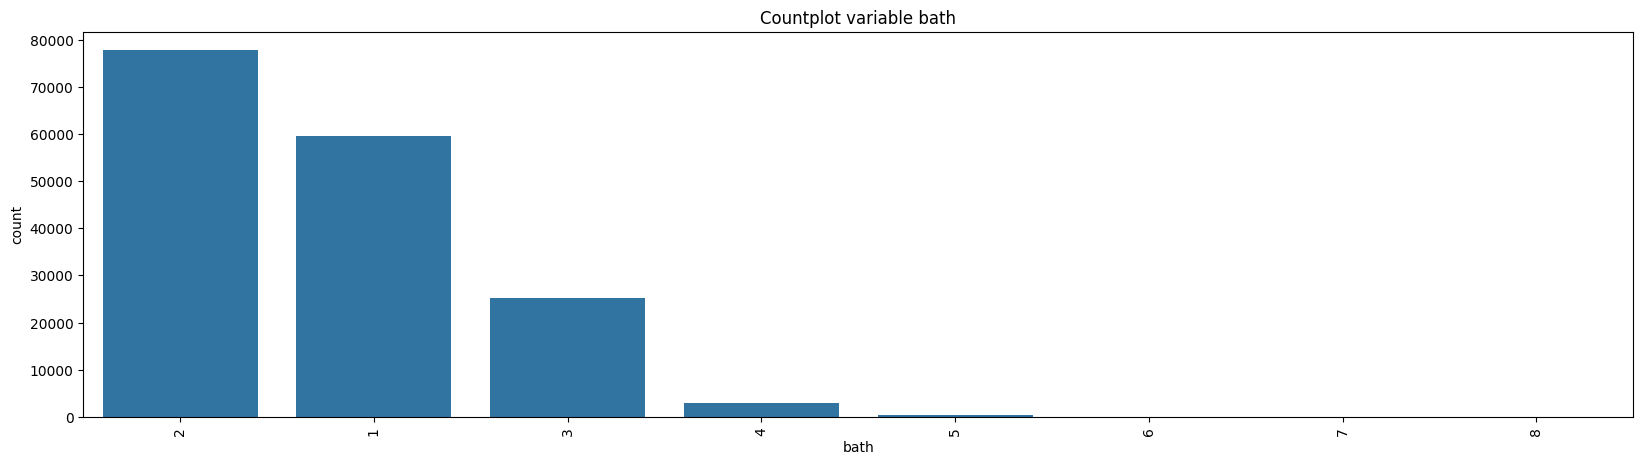

In [55]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="bath", data=dfc_Price_Bed, order=dfc_Price_Bed.bath.value_counts().index
)
plt.xticks(rotation=90)
plt.title("Countplot variable bath")
plt.show()

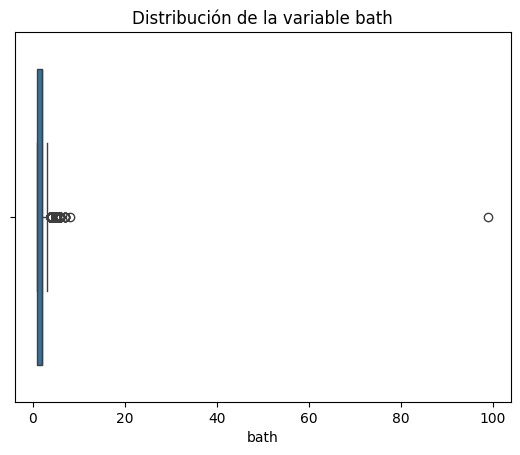

In [56]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price_Bed.bath)
ax.set_title("Distribución de la variable bath")
plt.show()

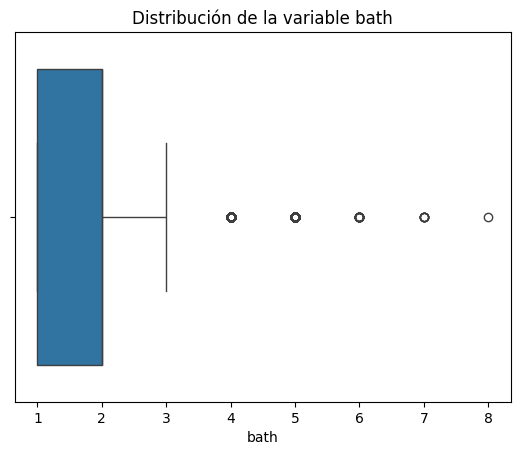

In [57]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price_Bed.bath)
ax.set_title("Distribución de la variable bath")
plt.show()

Vemos en el gráfico que a partir de 4 los valores son considerados extremos. Tomemos solo las casas que tienen hasta 4 baños:

In [58]:
df_Price_Bed_Bath = df_Price_Bed[df_Price_Bed.bath <= 4].copy()

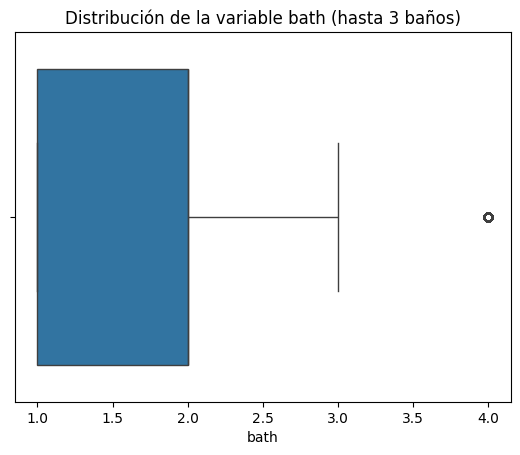

In [59]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price_Bed_Bath.bath)
ax.set_title("Distribución de la variable bath (hasta 3 baños)")
plt.show()

In [60]:
dfc_Price_Bed_Bath = dfc_Price_Bed[dfc_Price_Bed.bath <= 4].copy()

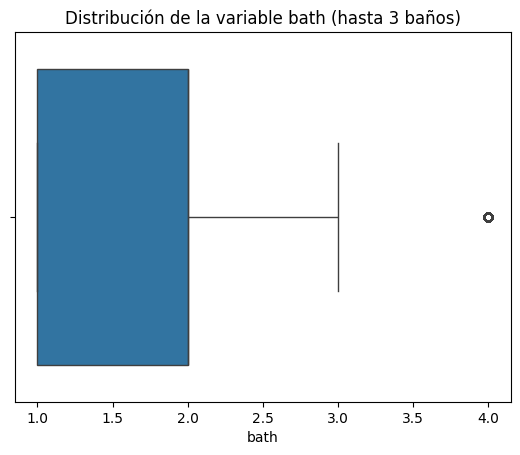

In [61]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price_Bed_Bath.bath)
ax.set_title("Distribución de la variable bath (hasta 3 baños)")
plt.show()

#### Car

In [62]:
df_Price_Bed_Bath.car.describe()

count    165413.000000
mean          1.873529
std           0.966666
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          30.000000
Name: car, dtype: float64

In [63]:
dfc_Price_Bed_Bath.car.describe()

count    165566.000000
mean          1.873935
std           0.966478
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          30.000000
Name: car, dtype: float64

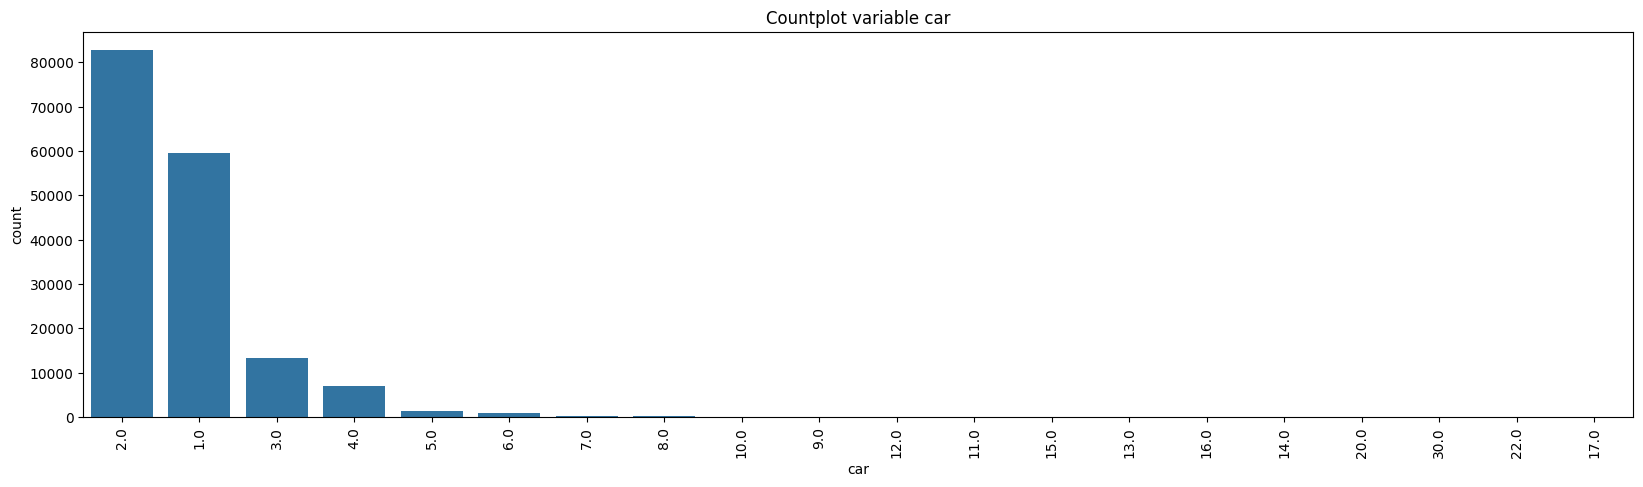

In [64]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="car", data=df_Price_Bed_Bath, order=df_Price_Bed_Bath.car.value_counts().index
)
plt.xticks(rotation=90)
plt.title("Countplot variable car")
plt.show()

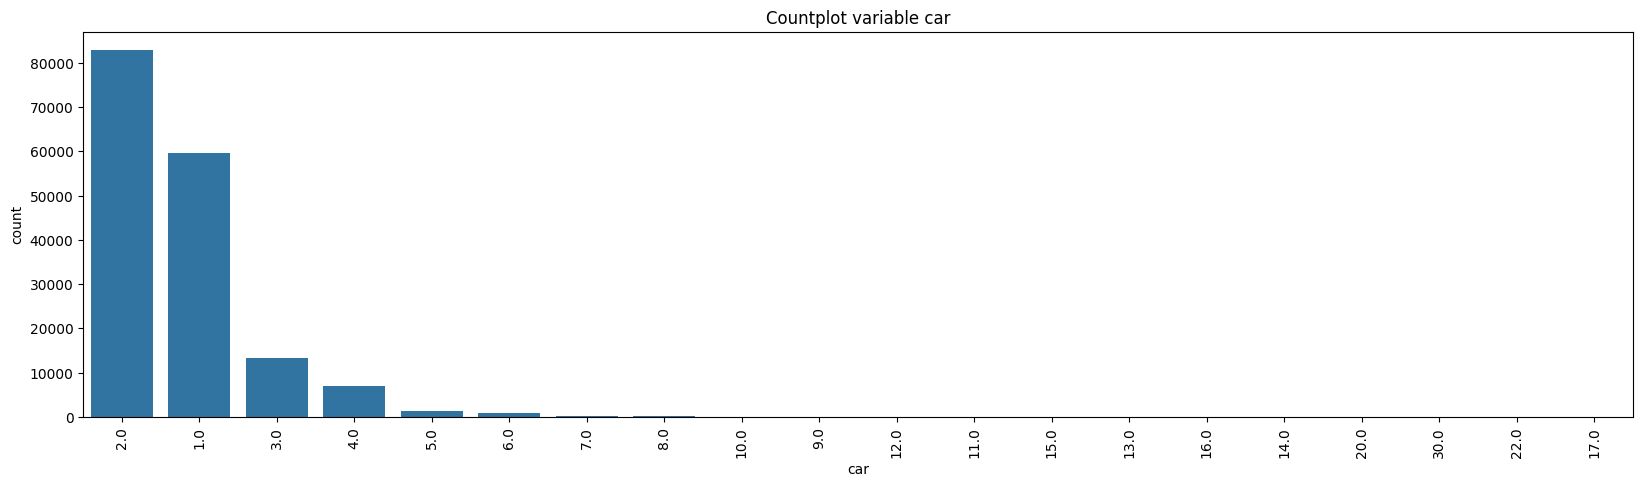

In [65]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.countplot(
    x="car", data=dfc_Price_Bed_Bath, order=dfc_Price_Bed_Bath.car.value_counts().index
)
plt.xticks(rotation=90)
plt.title("Countplot variable car")
plt.show()

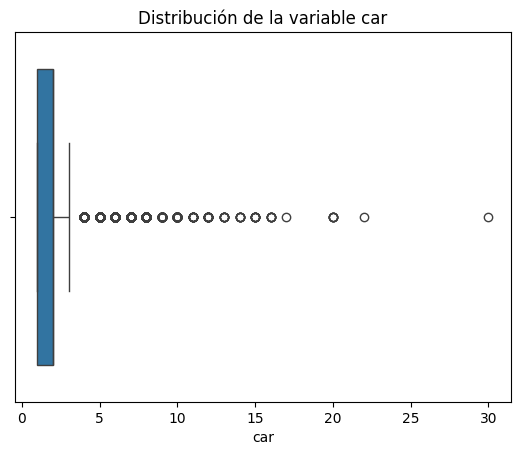

In [66]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price_Bed_Bath.car)
ax.set_title("Distribución de la variable car")
plt.show()

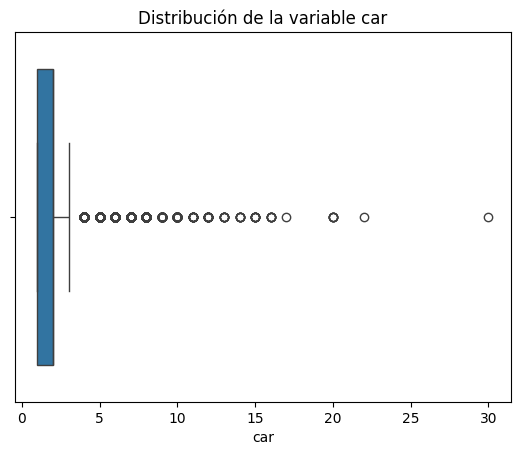

In [67]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price_Bed_Bath.car)
ax.set_title("Distribución de la variable car")
plt.show()

Lo mismo con autos, vemos que a partir de 4 hay muy pocos casos. Vamos a tomar solo hasta 4 autos

In [68]:
df_Price_Bed_Bath_Car = df_Price_Bed_Bath[df_Price_Bed_Bath.car <= 4]

In [69]:
dfc_Price_Bed_Bath_Car = dfc_Price_Bed_Bath[dfc_Price_Bed_Bath.car <= 4]

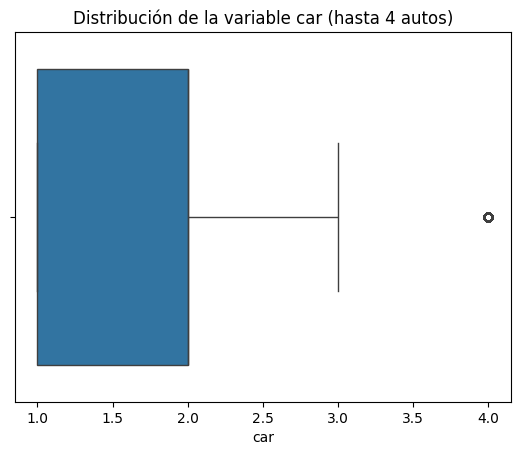

In [70]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df_Price_Bed_Bath_Car.car)
ax.set_title("Distribución de la variable car (hasta 4 autos)")
plt.show()

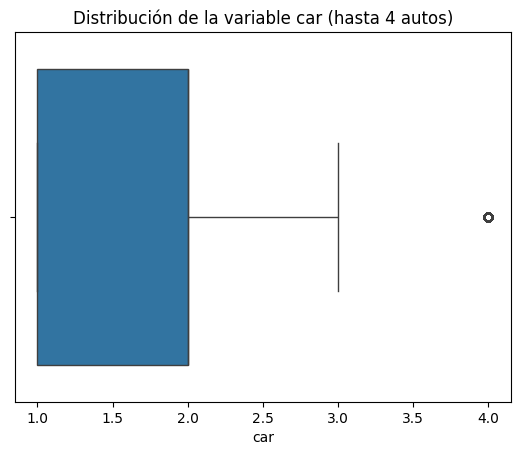

In [71]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=dfc_Price_Bed_Bath_Car.car)
ax.set_title("Distribución de la variable car (hasta 4 autos)")
plt.show()

## Relación entre variables

Ahora queremos ver, como estas distintas variables afectan el precio de las casas.

Para arrancar, podemos graficar un heatmap con correlaciones:

In [72]:
sns.heatmap(dfc_Price_Bed_Bath_Car.corr(method="kendall"))
plt.show()

ValueError: could not convert string to float: '2019-06-19'

No está muy claro, no? 

Hagamos algunos retoques.

Primero, sacamos la variable Id que no vamos a utilizar:

Además, vemos que en el heatmap aparece la variable postalCode. Esto no tiene sentido, ya que la variable postalCode es categórica.



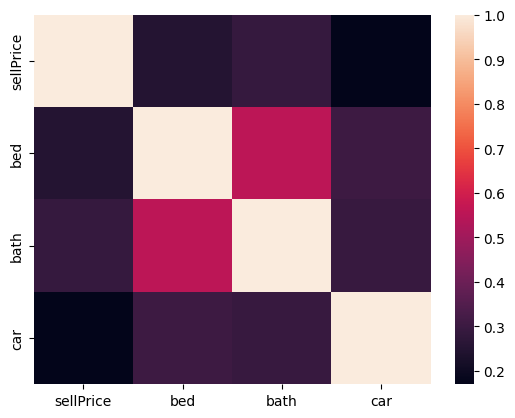

In [ ]:
df_corr = df_Price_Bed_Bath_Car[["sellPrice", "bed", "bath", "car"]].copy()

sns.heatmap(df_corr.corr(method="kendall"))
plt.show()

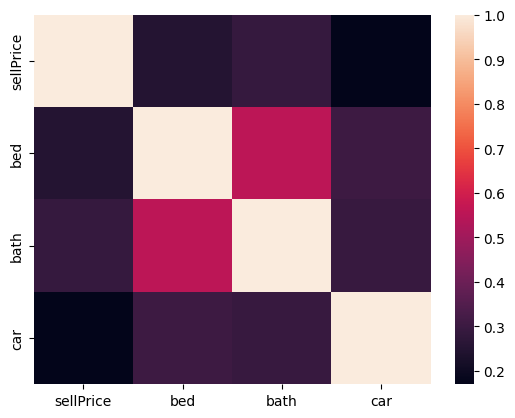

In [ ]:
dfc_corr = dfc_Price_Bed_Bath_Car[["sellPrice", "bed", "bath", "car"]].copy()

sns.heatmap(dfc_corr.corr(method="kendall"))
plt.show()

¿ Mejor ?

Igual, vemos que de la diagonal para arriba, el grafico se duplica. Eliminemos la mitad superior y utilicemos una paleta de colores que sea más simple de visualizar.

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

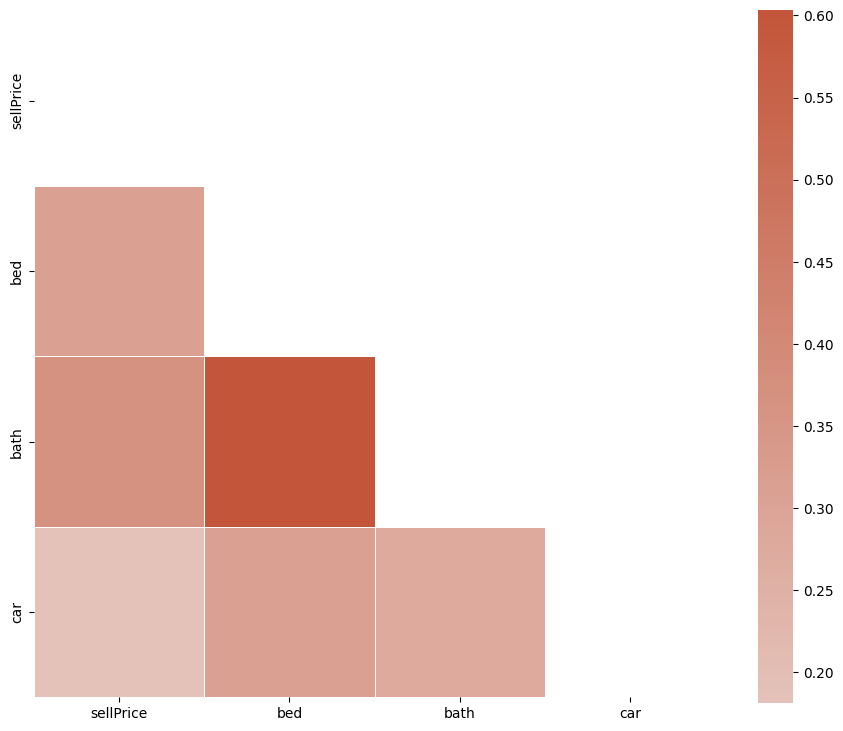

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr.corr(), mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5)

<Axes: >

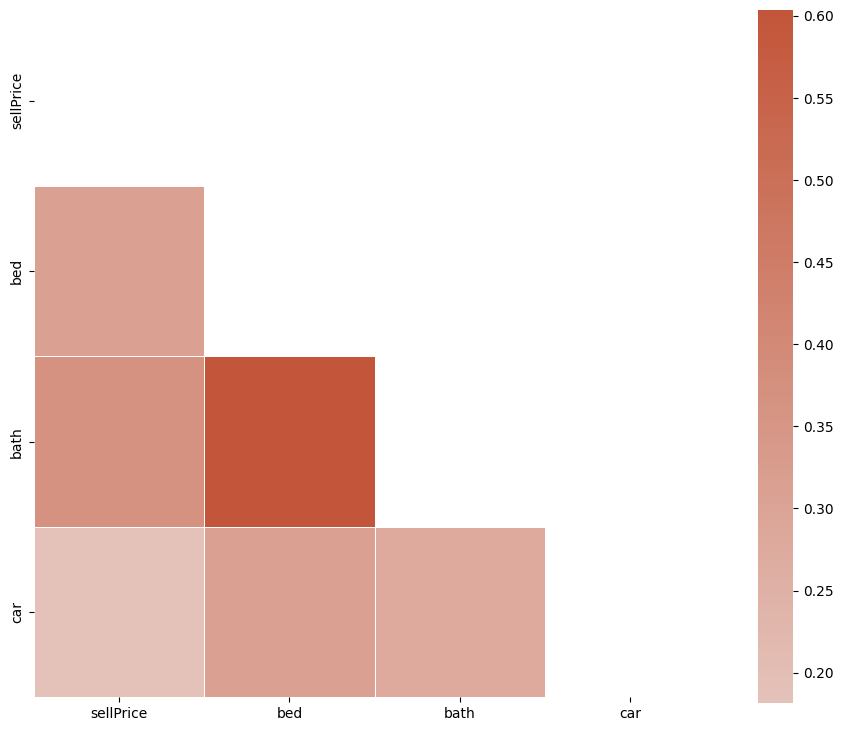

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dfc_corr.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    dfc_corr.corr(), mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5
)

In [ ]:
df_corr.corr()

,sellPrice,bed,bath,car
sellPrice,1.000000,0.314467,0.365083,0.181514
bed,0.314467,1.000000,0.603422,0.310152
bath,0.365083,0.603422,1.000000,0.278460
car,0.181514,0.310152,0.278460,1.000000


In [ ]:
dfc_corr.corr()

,sellPrice,bed,bath,car
sellPrice,1.000000,0.314979,0.365346,0.181726
bed,0.314979,1.000000,0.603597,0.310344
bath,0.365346,0.603597,1.000000,0.278761
car,0.181726,0.310344,0.278761,1.000000


Vemos que el par de variables con correlación más alta es: bath - bed.

Ahora, veamos como sube o baja el precio en relación a la cantidad de autos, camas y baños:

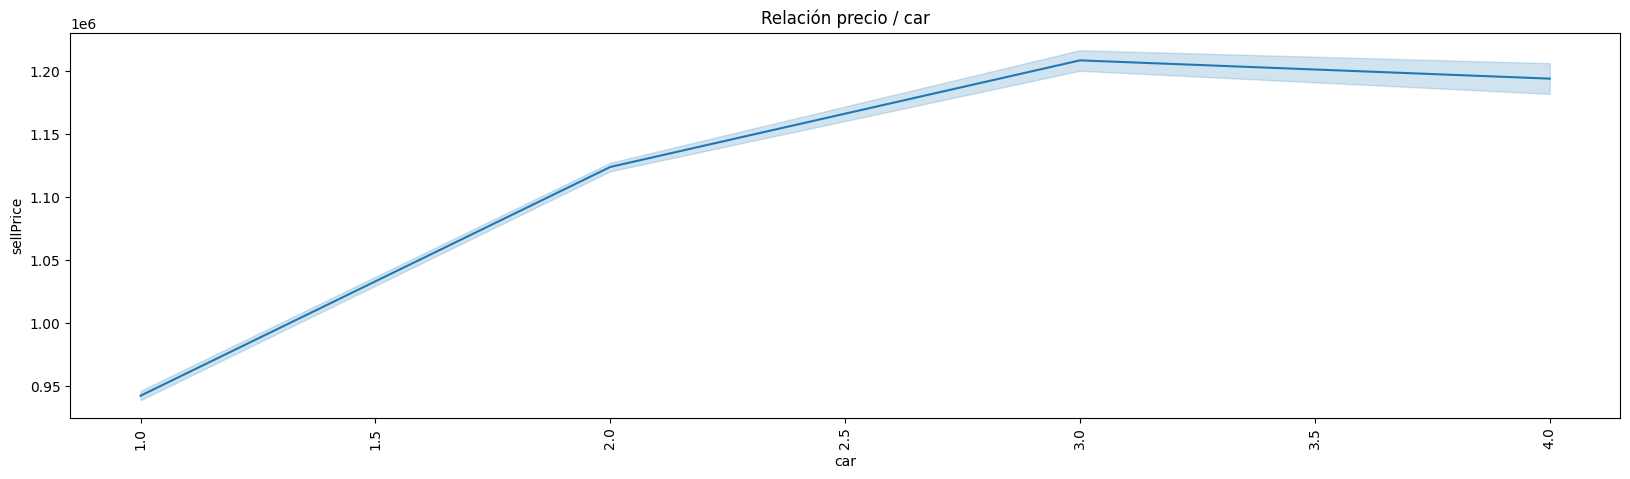

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="car", y="sellPrice", data=df_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / car")
plt.show()

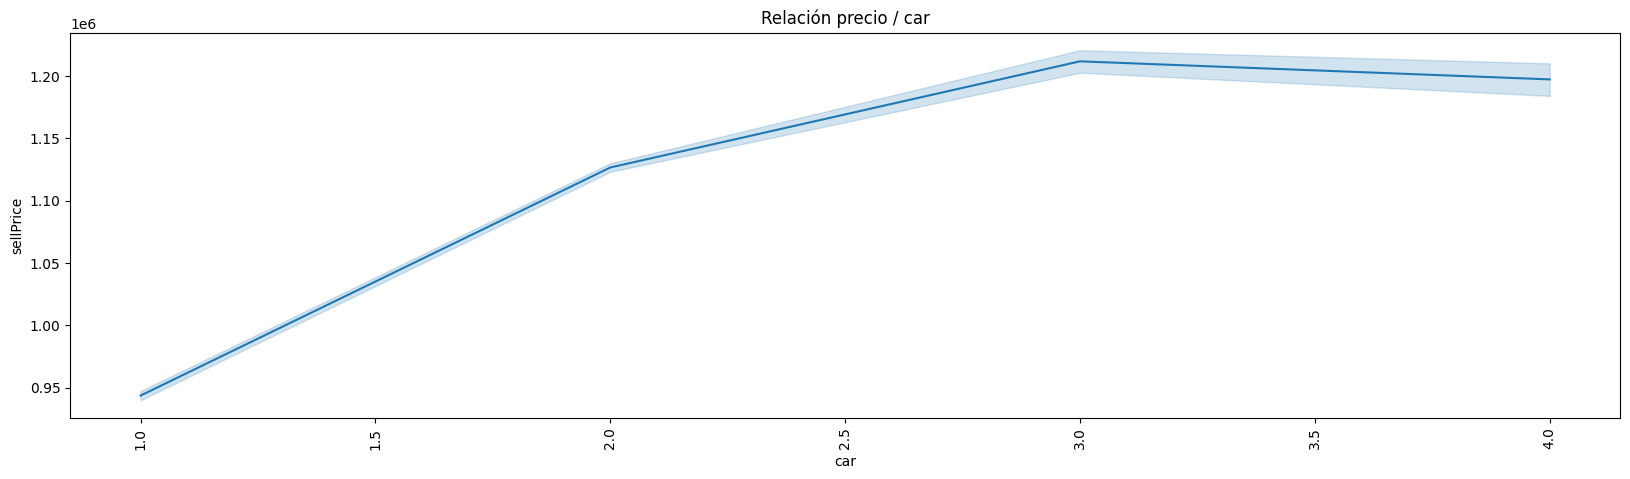

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="car", y="sellPrice", data=dfc_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / car")
plt.show()

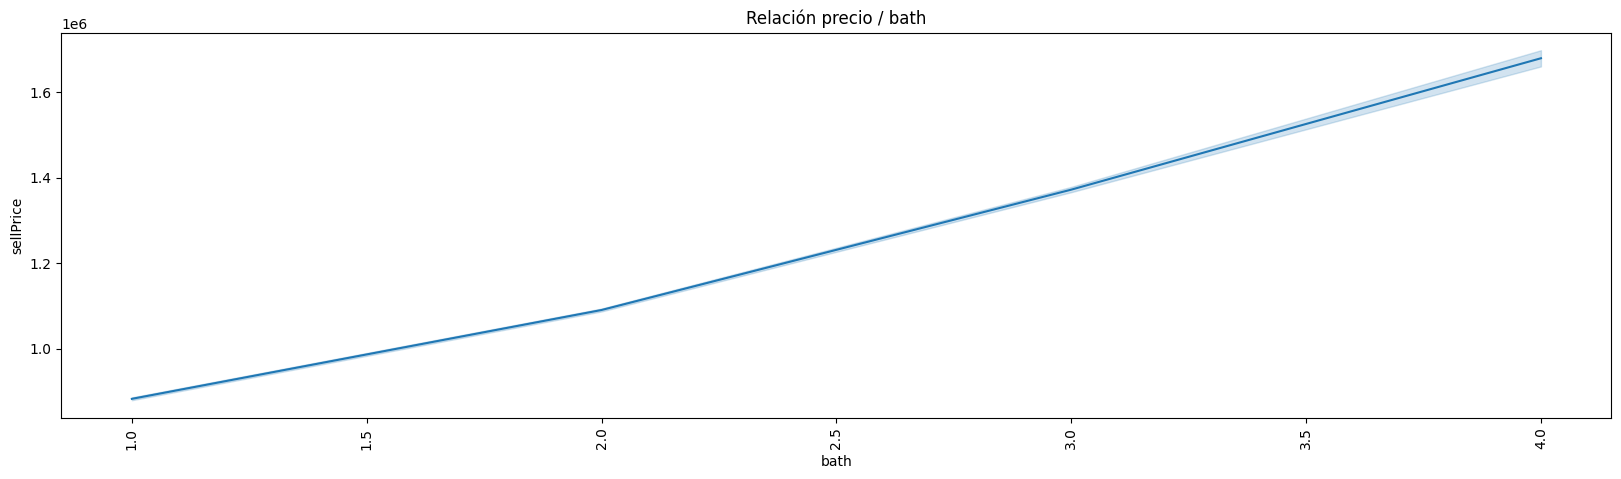

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="bath", y="sellPrice", data=df_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / bath")
plt.show()

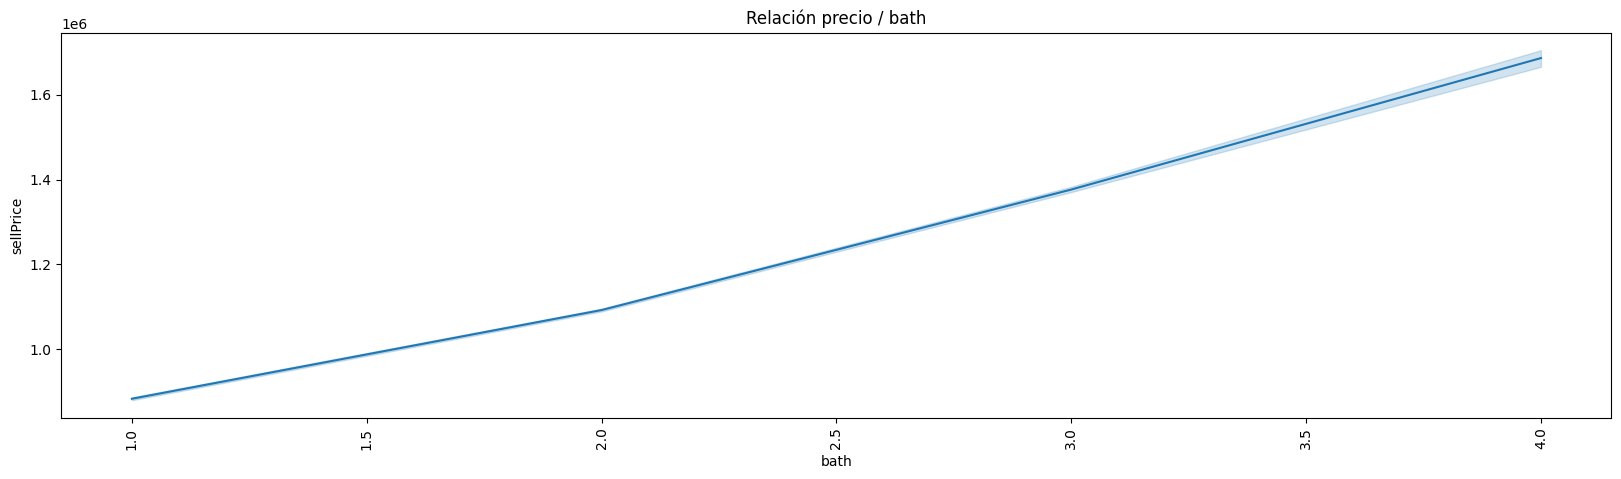

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="bath", y="sellPrice", data=dfc_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / bath")
plt.show()

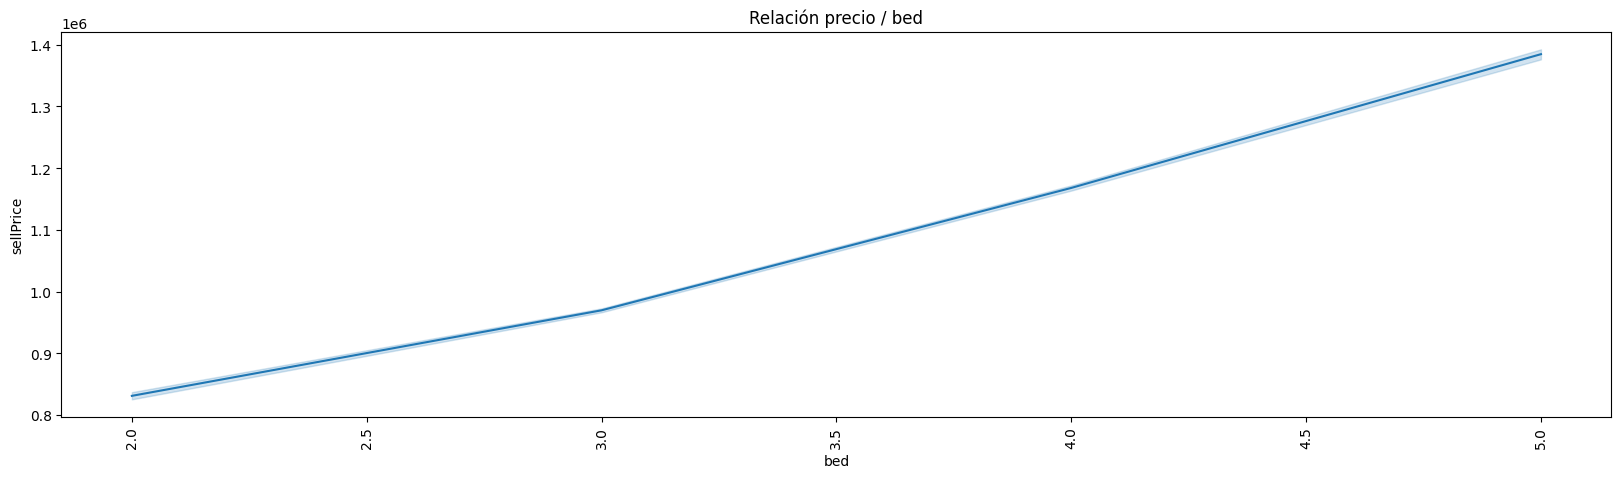

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="bed", y="sellPrice", data=df_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / bed")
plt.show()

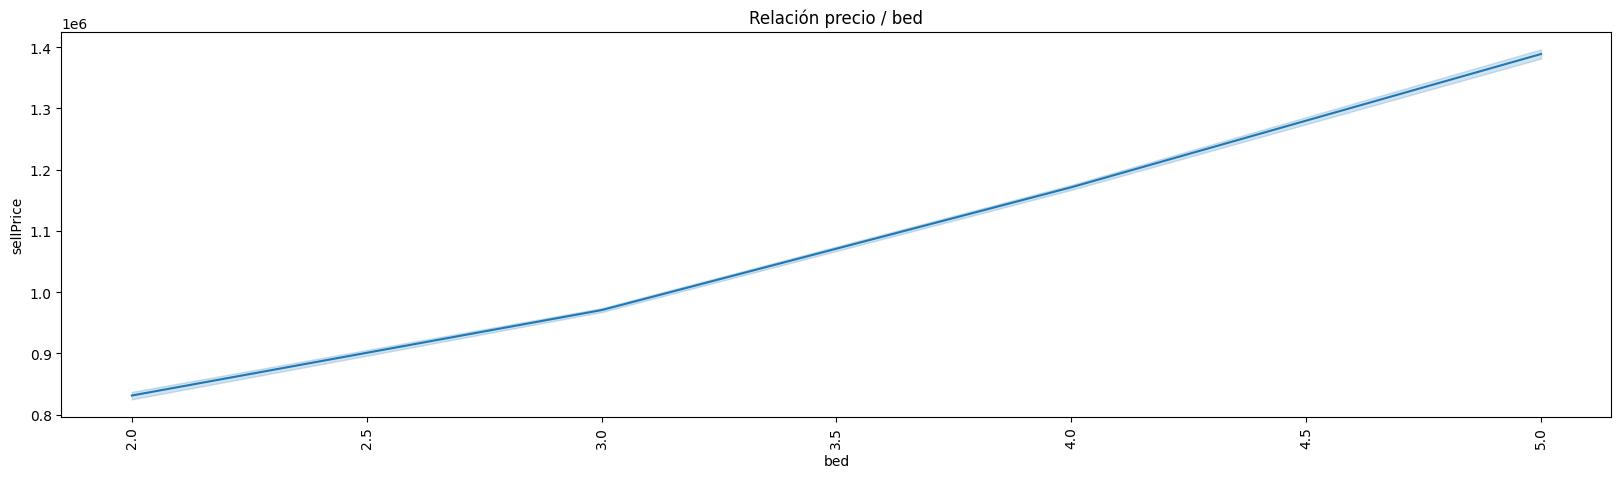

In [ ]:
fig = plt.figure(figsize=(20, 5))
ax = plt.axes()
ax = sns.lineplot(x="bed", y="sellPrice", data=dfc_Price_Bed_Bath_Car)
plt.xticks(rotation=90)
plt.title("Relación precio / bed")
plt.show()

In [ ]:
df_Price_Bed_Bath_Car.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
5,2019-05-10,6,Bilgola Plateau,2107,1610000,4.0,2,2.0,house
6,2019-04-13,7,Avalon Beach,2107,1510000,3.0,1,2.0,house


In [ ]:
dfc_Price_Bed_Bath_Car.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
5,2019-05-10,6,Bilgola Plateau,2107,1610000,4.0,2,2.0,house
6,2019-04-13,7,Avalon Beach,2107,1510000,3.0,1,2.0,house


# Ejercicio

Responder las siguientes preguntas (utilizando df como quedó, sin los valores extremos) y graficar cuando corresponda:

1- ¿ En qué suburb se encuentra la casa (house) más cara ?

2- ¿ Cuántos baños tiene la casa (house) más barata ?

3- Calcular el sellPrice medio para cada propType

4- ¿ Cuántas "townhouse" hay en el postalCode 2107 ?

5 - ¿ Cuál es el suburb con el sellPrice medio más alto ?

6 - Escribir una función que reciba una lista de propType y:
  - Primero valide que el propType sea válido (exista en el dataset, sea tipo sting y lo que consideren relevante validar), si no es válido, imprimir un error explicativo (pueden investigar "Raise exception" en python) y finalizar.
  - Por cada elemento válido de la lista, hacer un plot de la distribución de el sellPrice de ese tipo de propiedad.

In [73]:
dff = df_Price_Bed_Bath_Car.copy()

In [74]:
dffc = dfc_Price_Bed_Bath_Car.copy()

In [90]:
# 1- ¿ En qué suburb se encuentra la casa (house) más cara ?
condicion = dff["propType"] == "house"  # Condicion de que solo busque en el tipo de propiedad 'house' (devuelve una serie booleana)
idmaxHouse = dff[condicion]["sellPrice"].idxmax()  # Muestra el índice del valor de sellPrice máximo. (devuelve un escalar numpy.int64)
dff.loc[idmaxHouse, "suburb"]  # Muestra el suburbio de la house con idmaxHouse. (devuelve un string)

'Fairlight'

In [76]:
preciomax = dff[dff["propType"] == "house"]["sellPrice"].max()
preciomax

2607500

In [77]:
# 1- ¿ En qué suburb se encuentra la casa (house) más cara ?
idmaxHouse = dffc[dffc["propType"] == "house"]["sellPrice"].idxmax()
dffc.loc[idmaxHouse, "suburb"]

'Cabarita'

In [110]:
casas_df_filtrado=df[df['propType']=='house']
casas_mas_barata=casas_df_filtrado.loc[casas_df_filtrado['sellPrice'].idxmin()]
casas_mas_barata

Date          2008-07-02
Id                  7657
suburb           Killara
postalCode          2071
sellPrice              1
bed                  4.0
bath                   3
car                  2.0
propType           house
Name: 7656, dtype: object

In [129]:
# 2- ¿ Cuántos baños tiene la casa (house) más barata ? puede haber "muchas propiedades mas baratas"
condicion = dff["propType"] == "house"  # Condicion de que solo busque en el tipo de propiedad 'house'
minHouse = dff[condicion]["sellPrice"].min()  # Muestra el valor sellPrice mínimo.
# dff.loc[idminHouse, "bath"]  # Muestra la cantidad de baños de la house con idminHouse.
housesmin=dff[dff['sellPrice']==minHouse]
housesmin

# La pregunta deberia haber sido de la casa (house) más barata cual es la que tiene menos (o mas) baños?

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
7656,2008-07-02,7657,Killara,2071,1,4.0,3,2.0,house
109813,2012-06-22,109814,Turramurra,2074,1,4.0,2,2.0,house
133717,2009-11-13,133718,Lane Cove,2066,1,4.0,2,2.0,house
133881,2007-04-30,133882,Lane Cove,2066,1,3.0,2,1.0,house
133883,2007-03-31,133884,Lane Cove,2066,1,4.0,2,2.0,house
135222,2012-05-05,135223,Croydon,2132,1,5.0,2,2.0,house
139233,2009-04-04,139234,Newport,2106,1,4.0,2,3.0,house
152274,2011-11-07,152275,Palm Beach,2108,1,4.0,2,2.0,house
162107,2009-09-02,162108,Mona Vale,2103,1,5.0,3,2.0,house


In [128]:
# 2- ¿ Cuántos baños tiene la casa (house) más barata ?
condicion = dfc["propType"] == "house"
minHouse = dfc[condicion]["sellPrice"].min() 
housesmin=dfc[dfc['sellPrice']==minHouse]
housesmin

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
7656,2008-07-02,7657,Killara,2071,1,4.0,3,2.0,house
109813,2012-06-22,109814,Turramurra,2074,1,4.0,2,2.0,house
133717,2009-11-13,133718,Lane Cove,2066,1,4.0,2,2.0,house
133881,2007-04-30,133882,Lane Cove,2066,1,3.0,2,1.0,house
133883,2007-03-31,133884,Lane Cove,2066,1,4.0,2,2.0,house
135222,2012-05-05,135223,Croydon,2132,1,5.0,2,2.0,house
139233,2009-04-04,139234,Newport,2106,1,4.0,2,3.0,house
152274,2011-11-07,152275,Palm Beach,2108,1,4.0,2,2.0,house
162107,2009-09-02,162108,Mona Vale,2103,1,5.0,3,2.0,house


In [97]:
# 3- Calcular el sellPrice medio para cada propType
grupo=dff.groupby(["propType"]) # Agrupa por propType y luego obtiene el promedio de los precios.(devuelve un objeto groupby)
# NO es un dataframe No es una serie y NO tiene representación. Si se quiere, es como una enumeración de una agrupación.
grupo[["sellPrice"]].mean()  # Se obtiene el promedio de los precios de cada tipo de propiedad. (devuelve un DataFrame o una serie)

# Notar que el tipo de salida última, cambia de serie a dataframe dependiendo si colocamaos 'sellprice' o ['sellprice']
# type(grupo["sellPrice"].mean()) 
# type(grupo[["sellPrice"]].mean())

,sellPrice
propType,
acreage,1.368755e+06
duplex/semi-detached,9.466437e+05
house,1.115137e+06
other,8.391981e+05
terrace,1.282203e+06
townhouse,8.186753e+05
villa,6.803154e+05
warehouse,1.057192e+06


In [81]:
# 3- Calcular el sellPrice medio para cada propType
dffc.groupby(["propType"])[["sellPrice"]].mean()

,sellPrice
propType,
acreage,1.368755e+06
duplex/semi-detached,9.475648e+05
house,1.117640e+06
other,9.175756e+05
terrace,1.285318e+06
townhouse,8.191991e+05
villa,6.805637e+05
warehouse,1.298750e+06


In [100]:
# 4- ¿ Cuántas "townhouse" hay en el postalCode 2107 ?
condicion = (dff["postalCode"] == 2107) & (dff["propType"] == "townhouse")  # Se debe contar solo las townhouses con codigo postal 2107.
# devuelve una serie.
dff[condicion]["propType"].count()  # Se cuentan las propiedades.(devuelve un entero int64)

25

In [83]:
# 4- ¿ Cuántas "townhouse" hay en el postalCode 2107 ?
dffc[(dffc["postalCode"] == 2107) & (dffc["propType"] == "townhouse")]["propType"].count()

25

In [127]:
# 5 - ¿ Cuál es el suburb con el sellPrice medio más alto ?
grupo = dff.groupby(["suburb"])  # Se agrupa por suburbio.
mediasGrupales = grupo[["sellPrice"]].mean()  # Se obtiene la media de cada subrubio.
maximo = mediasGrupales.max().iloc[0]  # Se la máxima de las medias de los suburbios.
# maximo.iloc[0]  # Se obtiene el nombre del suburbio.
mediasGrupales[mediasGrupales['sellPrice']==maximo] # Se obtiene la lista de suburbios con la media mas alta.(pueden ser varios)

,sellPrice
suburb,
Sackville North,2550000.0


In [126]:
# 5 - ¿ Cuál es el suburb con el sellPrice medio más alto ?
dffc.groupby(["suburb"])[["sellPrice"]].mean().idxmax().iloc[0]

'Sackville North'

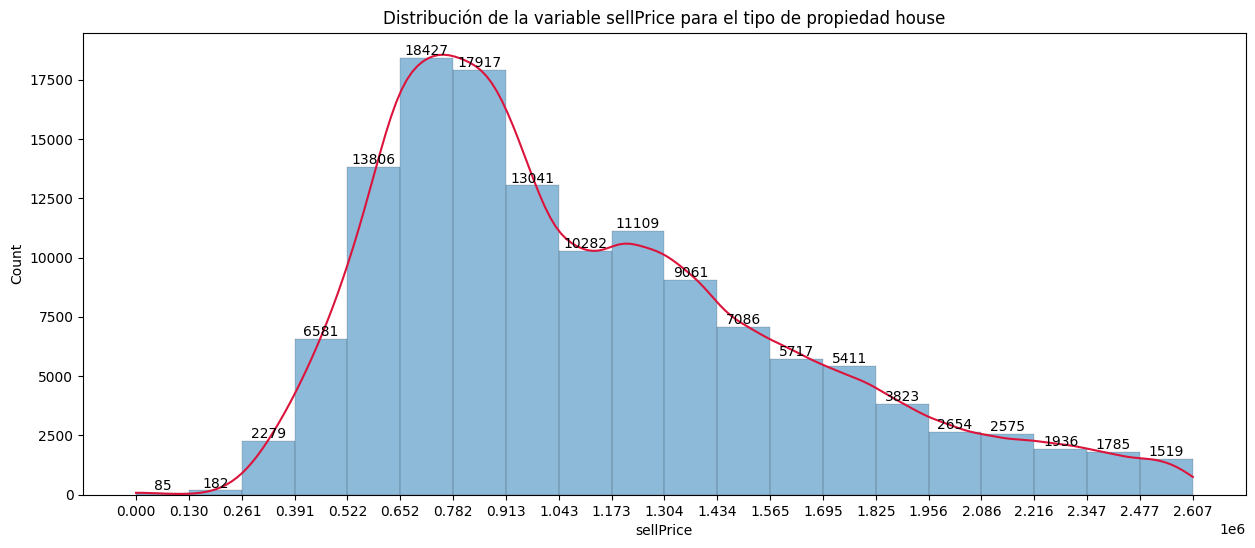

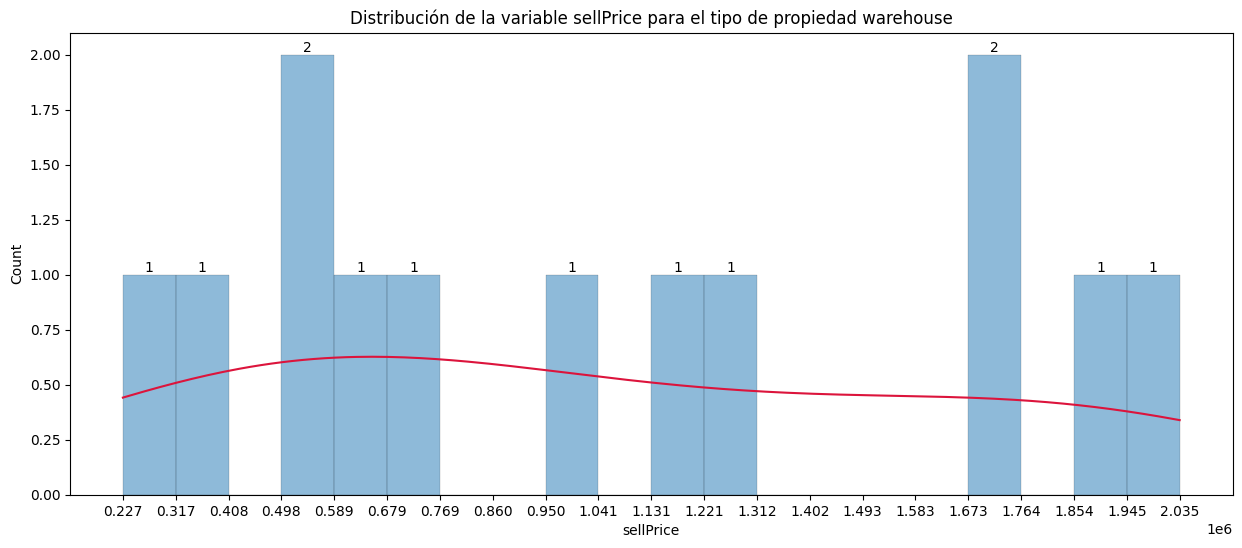

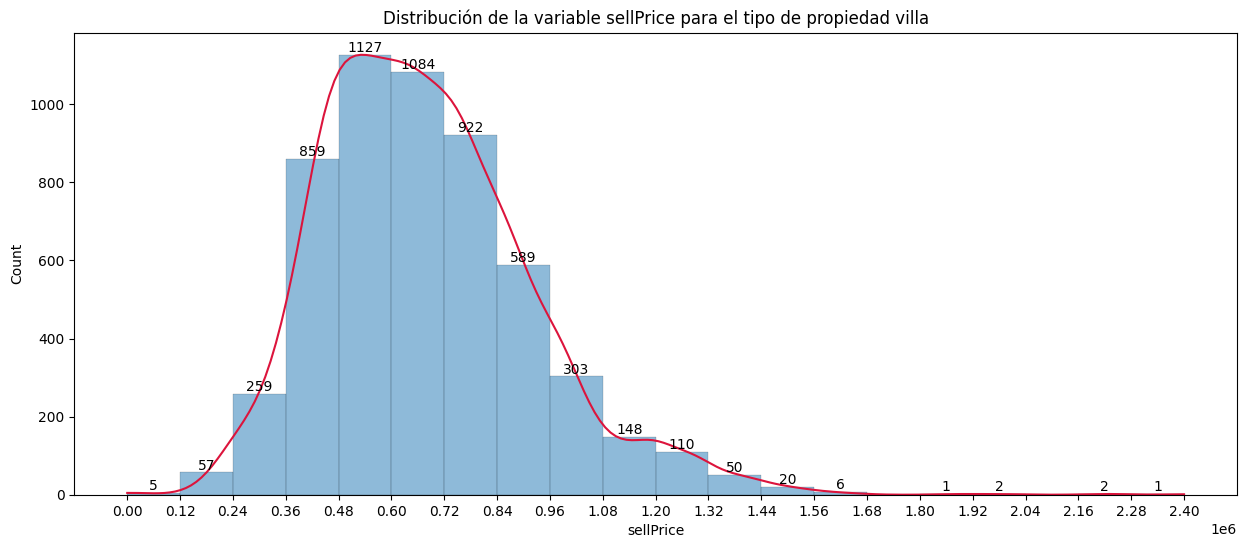

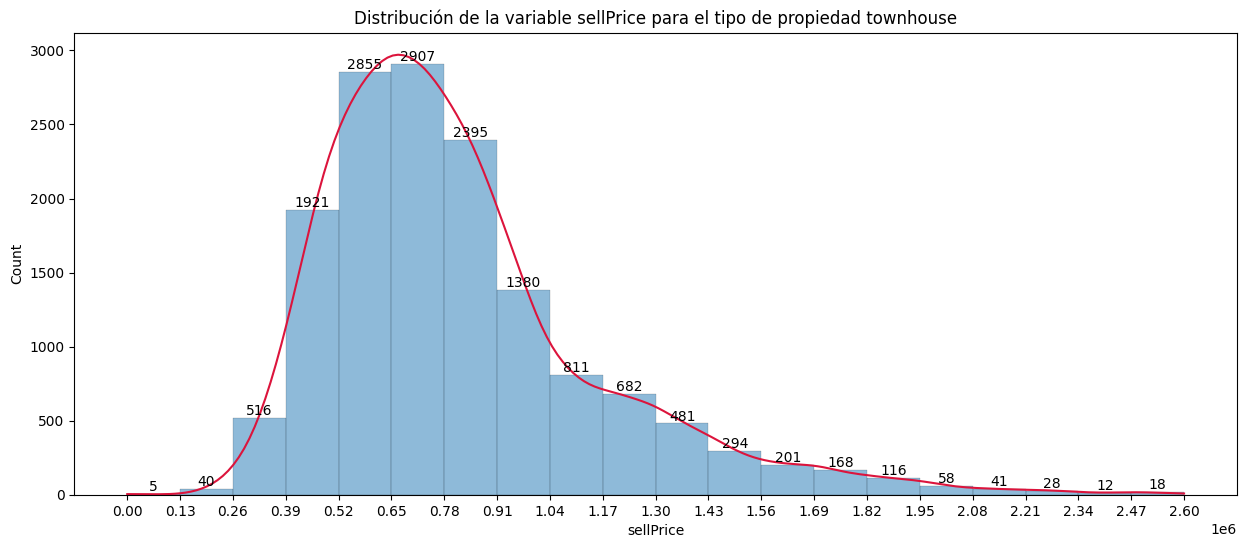

El tipo de propiedad "cualquiera" es inválida
Los tipos admitidos son: house, townhouse, duplex/semi-detached, villa, other, terrace, warehouse, acreage


In [101]:
# 6 - Escribir una función que reciba una lista de propType y:
# - Primero valide que el propType sea válido (exista en el dataset, sea tipo sting y lo que consideren relevante validar), si no es válido, imprimir un error explicativo (pueden investigar "Raise exception" en python) y finalizar.
# - Por cada elemento válido de la lista, hacer un plot de la distribución de el sellPrice de ese tipo de propiedad.


def propPrice(listProp, df):
    props = dff["propType"].unique()
    for prop in listProp:
        if prop in props:
            data = df[df["propType"] == prop]
            fig, ax = plt.subplots(figsize=(15, 6))

            ax = sns.histplot(data["sellPrice"], bins=20, kde=True, linewidth=0.1)
            ax.lines[0].set_color("crimson")
            ax.set_title(
                f"Distribución de la variable sellPrice para el tipo de propiedad {prop}"
            )

            # Coloco las marcas (xticks) en los extremos inferiores de cada barra (bin)
            bin_left = [patch.get_x() for patch in ax.patches]
            bin_width = ax.patches[0].get_width()
            bin_left.append(bin_left[-1] + bin_width)
            ax.set_xticks(bin_left)

            # Etiquetas sobre las barras
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    ax.annotate(
                        int(height),
                        (p.get_x() + p.get_width() / 2.0, height),
                        ha="center",
                        va="bottom",
                    )

            plt.show()
        else:
            print(f'El tipo de propiedad "{prop}" es inválida')
            print(f"Los tipos admitidos son: {', '.join(props)}")


propPrice(["house", "warehouse", "villa", "townhouse", "cualquiera"], dff)